In [164]:

# Importing necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
from math import inf
import matplotlib.pyplot as plt
from scipy import stats
import scipy.special as sp
from scipy.special import loggamma
from scipy.stats import beta, binom, norm, uniform
import csv
from math import inf
from statistics import mode


In [159]:
# Get the data
df_all_skateboarders = pd.read_csv("Datafil.csv")

contestants = [
    "Majerus", "Oliveira", "Decenzo", "Santiago",
    "Papa", "Eaton", "Mota", "Shirai",
    "Jordan", "Hoefler", "Hoban", "Gustavo",
    "Ribeiro C", "O’neill", "Foy", "Midler"
]

df = df_all_skateboarders[df_all_skateboarders['id'].isin(contestants)]
# Uncomment to see the dataframe
#df

# 1 Warm-up
The following tasks are designed to familiarize you with the dataset and prepare the data for use when building your predictive models.

### (a) 
All scores in the dataframe are currently numbers between 0 and 10. Normalize these values in the dataframe so that they range between 0 and 1.

In [6]:
for col in df.columns[5:]:
    df.loc[:, col] = df[col].apply(lambda x: x/10 if x == x else x)  # handle NaN values
    
#Using .loc ensures that we are modifying the original DataFrame instead of creating a view or copy of it

C:\Users\villi\AppData\Local\Temp\ipykernel_17140\1060903183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = df[col].apply(lambda x: x/10 if x == x else x)  # handle NaN values


### (b) 
Create a histogram for all trick scores for tricks 1-4. 
- What do you observe? 
- Is there a particular value that appears more often than the others? 
- If so, how does this value compare to the others?

In [7]:
# b) here i create a histogram fr normalized data
def plot_histograms(datafile):
    # List of tricks
    tricks = ["trick 1", "trick 2", "trick 3", "trick 4"]

    # Plot histograms for each trick
    for idx, trick in enumerate(tricks, 1):
        plt.subplot(2, 2, idx)  # 2x2 grid of histograms
        plt.hist(df[trick].dropna(), bins=20, alpha=0.7, color='blue')  # dropna() ensures NaN values are ignored
        plt.title(f"Histogram of {trick}")
        plt.xlabel("Score")
        plt.ylabel("Frequency")

    # Adjust layout to prevent overlaps and show the plot
    plt.tight_layout()
    plt.show()

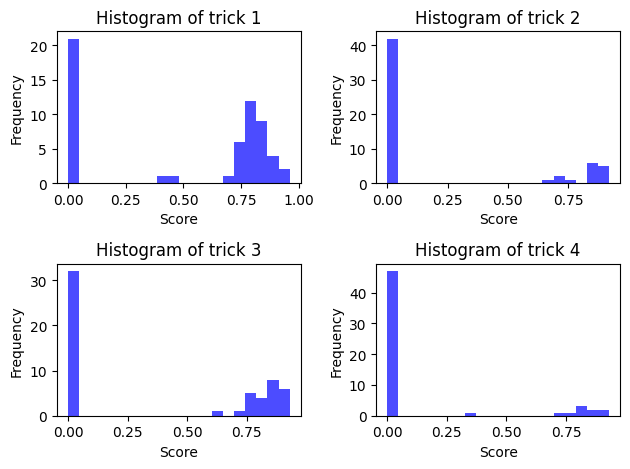

In [8]:
plot_histograms(df)

*From our observations, the most common score for each trick is zero, by a significant margin. The majority of other scores fall within the 0.6 to 0.9 range, with a noticeable lack of scores between 0 and 0.6. This pattern suggests that contestants tend to attempt more challenging tricks, which typically result in either failure (yielding a score of zero) or a relatively high score. This behavior indicates a tendency to bypass tricks of easy to medium difficulty.*

### (c)
- For each trick (1-4), create a new column named 'make i' for $i=1,2,3,4$. 
- The value of 'make i' in a given row should be 1 if the skateboarder successfully landed trick $i$ and 0 otherwise.

In [9]:
for i in range(1, 5):
    trick_column = f"trick {i}"
    
    # Assuming a trick is executed if its score > 0
    df.loc[:, f"make {i}"] = df.loc[:, trick_column].apply(lambda x: 1 if x > 0 else 0)

C:\Users\villi\AppData\Local\Temp\ipykernel_17140\3283509330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f"make {i}"] = df.loc[:, trick_column].apply(lambda x: 1 if x > 0 else 0)
C:\Users\villi\AppData\Local\Temp\ipykernel_17140\3283509330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f"make {i}"] = df.loc[:, trick_column].apply(lambda x: 1 if x > 0 else 0)
C:\Users\villi\AppData\Local\Temp\ipykernel_17140\3283509330.py:5: SettingWithCopyWarning: 
A value is trying to be se

### (d)
For each skateboarder, estimate the probability that a trick receives a score greater than 0.6, given that the skateboarder successfully lands the trick. 
- What is the probability that the skateboarder fails to land a particular trick? 
- What observations can you make? Relate your findings to your observations in part (b).

In [10]:

def estimate_probabilities(df):

    grouped_df = df.groupby('id')
    results = []

    for name, group in grouped_df:

        successful_tricks = group[[f"trick {i}" for i in range(1, 6)]].applymap(lambda x: 1 if x > 0 else 0).sum().sum()
        
        # Probability that a trick receives a score greater than 0.6 given the trick was landed
        tricks_score_more_than_06 = group[[f"trick {i}" for i in range(1, 6)]].applymap(lambda x: 1 if x >= 0.6 else 0).sum().sum()

        # Probability that a trick receives a score greater than 0.6 given the trick was landed
        prob_success_given_landed = tricks_score_more_than_06 / successful_tricks if successful_tricks > 0 else 0
        
        # Probability that the skateboarder fails to land a trick
        total_tricks = group[[f"trick {i}" for i in range(1, 6)]].count().sum()
        failed_tricks = group[[f"trick {i}" for i in range(1, 6)]].applymap(lambda x: 1 if x == 0 else 0).sum().sum()
        prob_failure = failed_tricks / total_tricks
        
        results.append((name, prob_success_given_landed, prob_failure))
    
    # Uncoment to see the results
    #for name, success_given_landed, failure in results:
    #    print(f"Skateboarder {name}: P(Score > 0.6 | Landed) = {success_given_landed:.2f}, P(Failure) = {failure:.2f}")

In [11]:
#Please note that this is for all tricks!
estimate_probabilities(df)

**Here, I will add a modified version of this code that handles each trick separately!**

In [12]:
def estimate_probabilities_by_individual_trick(df):
    # Group by skateboarder's name to get each skateboarder's data across all locations
    grouped_df = df.groupby('id')

    results = []

    for name, group in grouped_df:
        for i in range(1, 6):  # Iterate through each trick
            trick_col = f"trick {i}"

            # Number of times this specific trick was landed by the skateboarder across all locations
            successful_tricks = group[trick_col].apply(lambda x: 1 if x > 0 else 0).sum()

            # Number of times this specific trick got a score >= 0.6 by the skateboarder across all locations
            tricks_score_more_than_06 = group[trick_col].apply(lambda x: 1 if x >= 0.6 else 0).sum()

            # Probability that this trick receives a score greater than 0.6 given the trick was landed
            prob_success_given_landed = tricks_score_more_than_06 / successful_tricks if successful_tricks > 0 else 0

            # Total attempts of this specific trick by the skateboarder across all locations
            total_tricks = group[trick_col].count()

            # Number of times this specific trick failed (scored 0) by the skateboarder across all locations
            failed_tricks = group[trick_col].apply(lambda x: 1 if x == 0 else 0).sum()

            # Probability that the skateboarder fails to land this trick
            prob_failure = failed_tricks / total_tricks if total_tricks > 0 else 0

            results.append((name, trick_col, prob_success_given_landed, prob_failure))
            
    # Uncomment to see the results
    # for name, trick, success_given_landed, failure in results:
    #     print(f"Skateboarder {name} for {trick}: P(Score > 0.6 | Landed) = {success_given_landed:.2f}, P(Failure) = {failure:.2f}")

In [13]:
estimate_probabilities_by_individual_trick(df)

### (e) 
Create a scatter plot for run score 1 versus run score 2. 

- Do you see any clear correlation from the diagram?

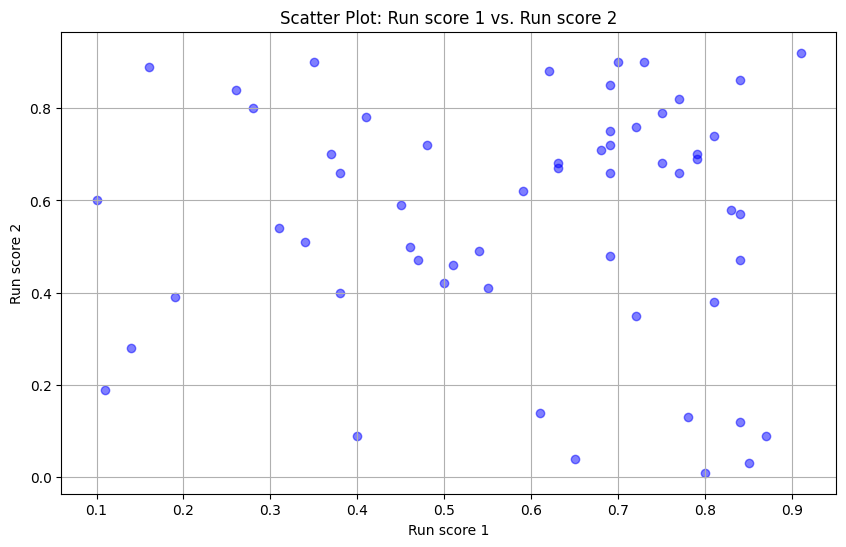

In [14]:
# Extracting data for plotting
x = df['run 1']
y = df['run 2']

# Creating the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Scatter Plot: Run score 1 vs. Run score 2')
plt.xlabel('Run score 1')
plt.ylabel('Run score 2')
plt.grid(True)

# Display the plot
plt.show()

# 2. A Frequentist Model

## Problem Statment
We'd like to construct a model that can predict which of the 16 skateboarders in the LCQ will secure a spot in the final. 

One approach to this is to construct a model for each skateboarder, utilize these models to simulate run scores and trick scores for every skateboarder, and then combine these simulations to simulate the LCQ as a whole. 

By simulating multiple LCQs, we can extract the top four skateboarders with the highest cumulative scores from each. 
Our prediction would then be the mode of these outcomes. 

**NOTE:** *Please note that this model assumes that the performances of the skateboarders are independent. For the sake of simplicity, we'll assume that the score for a particular run $Y_i$ and the score for a specific trick $X_i$ are independent for each skateboarder.*

- For skateboarder $i$, we assume that all trick scores and run scores are independent and have identically distributed outcomes from $X_i$ and $Y_i$ respectively. 

- We can start by specifying a model for $X_i$ and $Y_i$. 

---

From the observations in Task 1, a plausible model for $X_i$ is the following:
$$
X_i = 
\begin{cases} 
0 & \text{if } V_i = 0, \\ 
Z_i & \text{if } V_i = 1,
\end{cases}
$$
where 
$$ V_i \sim \text{Ber}(\theta_i), $$
$$ Z_i \sim \text{Beta}(\alpha_i, \beta_i) $$
and 
$$ V_i \perp Z_i. $$
It can be shown that
$$ 
f_{X_i}(x_i | \theta_i, \alpha_i, \beta_i) = (1-\theta_i) \mathbb{1}_{\{x_i=0\}} + \theta_i f_{Z_i}(z_i).
$$
The choice $ V_i \sim \text{Ber}(\theta_i) $ models the fact that a skateboarder receives a score of 0 if and only if they do not successfully land the trick. Meanwhile, the choice $ Z_i \sim \text{Beta}(\alpha_i, \beta_i) $ models that the score for a particular trick represents the portion of the trick that was "perfect."

## (a) Provide a point estimate for each $\theta_i$

### ANALYTICAL ANSWER:

https://en.wikipedia.org/wiki/Bernoulli_distribution

---



We can attempt a ML point estimation for $\theta_i$ since we know that $V_i$ follows a Bernoulli distribution with parameter $\theta_i$.

$$ V_i \sim \text{Ber}(\theta_i) $$
$$
f_{V_i}\left(\theta_i\right)=\theta_i^{v_i}\left(1-\theta_i\right)^{1-v_1}
$$

*Note: Parameter $\theta_i$ for $\text{Ber}(\theta_i)$ has to be $\theta_i \in[0,1]$ we lake this since we normalized the scores.*

$$
\log L\left(\theta \mid v_j\right)=\log \prod_i^n \theta_i^{v_i}(1-\theta_i)^{1-v_i}=
$$
$$
=\sum_{k=1}^n \log \theta_i^{v_k}(1-\theta_i)^{1-x_k}=\sum_{k=1}^n \log \theta_i^{v_k}+\sum_{k=1}^n \log \left(1-\theta_i\right)^{1-v_k}=
$$
$$
=\log \theta_i \cdot \sum_{k=1} V_k+\log \left(1-\theta_i\right) \sum\left(1-V_k\right)
$$

*We can now attmpt to take a derivative.*

$$
L^{\prime}\left(\theta_i \mid v\right)=\frac{\sum V_k}{\theta_i}-\frac{1}{1-\theta_i}\sum_{k=1}^n\left(1-v_k\right)=\frac{\sum_{k=1}^n v_k}{\theta_i}-\frac{\left(n-\sum_{k=1}^n v_k\right)}{1-\theta_i}
$$

*To find the critical point we set $L^{\prime}\left(\theta_i \mid v\right)=0$*
$$
\frac{\sum_{k=1}^n v_k}{\theta_i}-\frac{\left(n-\sum_{k=1}^n v_k\right)}{1-\theta_i}=0
$$

$$
\frac{\sum_{k=1}^n v_k}{\theta_i}-\frac{\left(n-\sum_{k=1}^n v_k\right)}{1-\theta_i}=0
$$

$$
\frac{\sum_{k=1}^n v_k}{\theta_i}=\frac{\left(n-\sum_{k=1}^n v_k\right)}{1-\theta_i}
$$

$$
\sum_{k=1}^n v_k-\theta_i \sum_{k=1}^n v_k=\theta_i n-\theta_i\sum_{k=1}^nv_k
$$

$$
\sum_{k=1}^n v_k=\theta_i n
$$

$$
\theta_i=\frac{\sum_{k=1}^n v_k}{n}
$$

***We can see that this is just a sample mean.***

---

### NUMERICAL ANSWER:

***Calculating $\theta_i$ for each  at each location:***

In [156]:
# Extracting data and calculating the mean for each skateboarder at each location.
make_columns = ['make 1', 'make 2', 'make 3', 'make 4']

df['total_made'] = df[make_columns].sum(axis=1)
df['total_attempted'] = df[['trick 1', 'trick 2', 'trick 3', 'trick 4']].notna().sum(axis=1)
df['theta_i'] = df['total_made'] / df['total_attempted']

***Calculating colective $\theta_i$ for each skateboarder:***

In [84]:
# Group by 'id' and compute the mean of theta_i for each skateboarder
theta_average = df.groupby('id')['theta_i'].mean().reset_index()

# Rename the columns for clarity
theta_average.columns = ['id', 'theta_average']

#Okay, that's great! 
# Now I have this information, but I would like to save it into the main DataFrame file.
# Merge the theta_average DataFrame with the original df on 'id'
df = df.merge(theta_average, on='id', how='left')

# Uncoment to see the results.
#print(theta_average)


***Creating results_df***

In [45]:
# Round all float columns to 5 decimal places
df = df.round(5)
results_df = theta_average[['id', 'theta_average']]

results_df

,id,theta_average
0,Decenzo,0.437500
1,Eaton,0.625000
2,Foy,0.500000
3,Gustavo,0.400000
4,Hoban,0.400000
5,Hoefler,0.437500
6,Jordan,0.400000
7,Majerus,0.375000
8,Midler,0.333333
9,Mota,0.250000


## (b) Provide a point estimate for the parameters $\left[\alpha_i, \beta_i\right]^{\mathrm{T}}$ for each skateboarder $i$. 

### ANALYTICAL ANSWER:

https://en.wikipedia.org/wiki/Gamma_distribution

https://en.wikipedia.org/wiki/Beta_distribution

---

For the Beta distribution:
$$
f\left(z_i \mid \alpha_i, \beta_i\right)=\frac{z_i^{\alpha_i-1}\left(1-z_i\right)^{\beta_i-1}}{B\left(\alpha_i, \beta_i\right)}
$$
where $B\left(\alpha_i, \beta_i\right)$ is the beta function, which acts as a normalization constant.

From the provided data, we have scores for each trick when it's not zero. 
To estimate $\alpha_i$ and $\beta_i$, we can make use of the mean and variance properties of the Beta distribution.

To the population mean and variance, we knwo from formula sheet:

- Mean: $\mu=\frac{\alpha_i}{\alpha_i+\beta_i}$
- Variance: $\sigma^2=\frac{\alpha_i \beta_i}{\left(\alpha_i+\beta_i\right)^2\left(\alpha_i+\beta_i+1\right)}$

$$
\mu = \frac{\alpha}{\alpha+\beta} \quad \text { and } \quad S^2 = \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)} .
$$
Solving for $\alpha$ and $\beta$:
$$
\beta = \frac{\alpha - \alpha \mu}{\mu} = \frac{\alpha}{\mu} - \alpha .
$$
After substituting and simplifying, we find:
$$
\alpha = \mu\left(\frac{\mu(1-\mu)}{S^2}-1\right) .
$$
Expressing $\beta$ using $\mu$ and $S^2$:
$$
\beta = (1-\mu)\left(\frac{\mu(1-\mu)}{S^2}-1\right) .
$$
We can derive the method of moment estimators for $\alpha$ and $\beta$ are:
$$
\hat{\alpha} = \mu\left(\frac{\mu(1-\mu)}{S^2}-1\right) \text { and } \hat{\beta} = (1-\mu)\left(\frac{\mu(1-\mu)}{S^2}-1\right)
$$


---

We can write:
$$
f\left(x_i \mid \alpha, \beta, V_i=1\right) = f\left(z_i \mid \alpha, \beta\right) = L\left(\alpha, \beta \mid V_i=1, X_i=x_i\right)
$$

Lets rewrite the $\mathrm{B}(\alpha, \beta)$ function:


$$
\mathrm{B}(\alpha, \beta)=\frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha+\beta)}
$$

Now let's do the only thing we, God willing, know how to do: a ML point estimation.

$$
f_z(z \mid \alpha, \beta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} z^{\alpha-1}(1-z)^{\beta-1}
$$

$$
\log L(\alpha, \beta \mid z)=\log \prod_{i=1}^n\left(\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} z_i^{\alpha-1}\left(1-z_i\right)^{\beta-1}\right)
$$

$$
=n \log \left(\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)}\right)+(\alpha-1) \sum_i^n \log z_i+(\beta-1) \sum_{i=1}^n \log \left(1-z_i\right)
$$

We take derivatives with respect to $\alpha$ and $\beta$.

For the first term, using the properties of logarithms and the derivative of the Gamma function, $\psi(z)=\frac{d}{d z} \log \Gamma(z)$, this we found online...

$$
\frac{\partial L}{\partial \alpha}=n \psi(\alpha+\beta)-n \psi(\alpha)+\sum_{i=1}^n \log z_i
$$

$$
\frac{\partial L}{\partial \beta}=n \psi(\alpha+\beta)-n \psi(\beta)+\sum_i^n \log \left(1-z_i\right)
$$

We can rewrite this as:

$$
\begin{aligned}
& \frac{\partial L}{\partial \alpha}=\psi(\alpha)-\psi(\alpha+\beta)-\frac{1}{n} \sum_{i=1}^n \log \left(z_i\right) \\
& \frac{\partial L}{\partial \beta}=\psi(\beta)-\psi(\alpha+\beta)-\frac{1}{n} \sum_{i=1}^n \log \left(1-z_i\right)
\end{aligned}
$$


*I guess this is the equivalent of running headfirst into a wall...*

---


### NUMERICAL ANSWER:

#### Getting the data

##### Obtaining all the tricks for a unique ID.

In [48]:
trick_columns = ['trick 1', 'trick 2', 'trick 3', 'trick 4']
# Group by 'id' and aggregate tricks for each skateboarder
all_tricks_df_with_zeroes = df.melt(id_vars='id', value_vars=trick_columns)\
                  .groupby('id')['value']\
                  .apply(list)\
                  .reset_index()
# Rename the columns for clarity
all_tricks_df_with_zeroes.columns = ['id', 'tricks']

# Uncoment this to see the results.
all_tricks_df_with_zeroes

,id,tricks
0,Decenzo,"[0.78, 0.86, 0.87, 0.0, 0.0, 0.0, 0.0, 0.86, 0..."
1,Eaton,"[0.75, 0.0, 0.84, 0.84, 0.77, 0.75, 0.0, 0.0]"
2,Foy,"[0.8, 0.0, 0.79, 0.83, 0.9, 0.0, 0.88, 0.9, 0...."
3,Gustavo,"[0.83, 0.0, 0.77, 0.8, 0.8, 0.74, 0.0, 0.0, 0...."
4,Hoban,"[0.0, 0.82, 0.91, 0.86, 0.86, 0.0, 0.92, 0.89,..."
5,Hoefler,"[0.0, 0.85, 0.73, 0.78, 0.67, 0.0, 0.0, 0.0, 0..."
6,Jordan,"[0.0, 0.0, 0.84, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,Majerus,"[0.79, 0.4, 0.0, 0.0, 0.0, 0.0, 0.36, 0.0]"
8,Midler,"[0.0, 0.79, 0.0, 0.0, 0.0, 0.73, 0.87, 0.0, 0...."
9,Mota,"[0.78, 0.0, 0.69, 0.0, 0.87, 0.0, 0.0, 0.0, 0...."


##### Obtaining all the non-zero tricks for a unique ID.

In [85]:
# This function aggregates the tricks by filtering out zero values
def aggregate_tricks(tricks):
    return list(tricks[tricks != 0])

In [86]:
trick_columns = ['trick 1', 'trick 2', 'trick 3', 'trick 4']

# Group by 'id' and aggregate tricks for each skateboarder
all_tricks_df = df.melt(id_vars='id', value_vars=trick_columns)\
                  .groupby('id')['value']\
                  .agg(aggregate_tricks)\
                  .reset_index()

# Rename the columns for clarity
all_tricks_df.columns = ['id', 'tricks']

# Uncoment this to see the results.
all_tricks_df

,id,tricks
0,Decenzo,"[0.78, 0.86, 0.87, 0.86, 0.78, 0.93, 0.71]"
1,Eaton,"[0.75, 0.84, 0.84, 0.77, 0.75]"
2,Foy,"[0.8, 0.79, 0.83, 0.9, 0.88, 0.9]"
3,Gustavo,"[0.83, 0.77, 0.8, 0.8, 0.74, 0.83, 0.88, 0.76]"
4,Hoban,"[0.82, 0.91, 0.86, 0.86, 0.92, 0.89, 0.88, 0.88]"
5,Hoefler,"[0.85, 0.73, 0.78, 0.67, 0.78, 0.87, 0.75]"
6,Jordan,"[0.84, 0.9, 0.88, 0.9, 0.9, 0.7, 0.88, 0.91]"
7,Majerus,"[0.79, 0.4, 0.36]"
8,Midler,"[0.79, 0.73, 0.87, 0.84]"
9,Mota,"[0.78, 0.69, 0.87]"


#### Moment estimators

In [103]:
Moment_Estimators_results_alpha_beta_df = all_tricks_df.copy()

In [59]:
def get_moment_estimators(data):
    
    moment_estimators = []
    
    # I want to handel if I have only 1 datpoint.
    if len(data) == 1:
        mean = data[0]
        global_trick_data = sum(all_tricks_df['tricks'].tolist(), [])
        variance = np.var(global_trick_data, ddof=1)
    else:
        # Calculate mean
        mean = np.mean(data)
        
        # Calculate variance
        # ddof=1 means that we want to calculate the sample variance
        variance = np.var(data, ddof=1)
    
    #-----------------------------------
    
    # Calculate a1
    a1 = mean * (mean * (1 - mean) / variance - 1)
    moment_estimators.append(a1)
    
    # Calculate b1
    b1 = (1 - mean) * (mean * (1 - mean) / variance - 1)
    moment_estimators.append(b1)
    
    return moment_estimators


In [145]:
for index, row in Moment_Estimators_results_alpha_beta_df.iterrows():
    samps = np.array(row['tricks'])
    
    alpha_beta = get_moment_estimators(samps)
   
    Moment_Estimators_results_alpha_beta_df.at[index, 'alpha_trick'] = round(alpha_beta[0],2)
    Moment_Estimators_results_alpha_beta_df.at[index, 'beta_trick'] = round(alpha_beta[1],2)

In [107]:
results_df_Moment_Estimators = results_df.copy()

In [108]:
results_df_Moment_Estimators['alpha_trick'] = Moment_Estimators_results_alpha_beta_df['alpha_trick']
results_df_Moment_Estimators['beta_trick'] = Moment_Estimators_results_alpha_beta_df['beta_trick']
results_df_Moment_Estimators

,id,theta_average,alpha_trick,beta_trick
0,Decenzo,0.437500,20.84,4.36
1,Eaton,0.625000,60.17,15.99
2,Foy,0.500000,42.85,7.56
3,Gustavo,0.400000,61.71,15.31
4,Hoban,0.400000,94.13,13.14
5,Hoefler,0.437500,27.77,8.03
6,Jordan,0.400000,20.07,3.17
7,Majerus,0.375000,1.77,1.66
8,Midler,0.333333,32.59,7.77
9,Mota,0.250000,15.74,4.44



#### Gradient descent

##### Math and gameplan

*Let's do gradient descent and try to solve it numerically.*

Basic game plan:

1. ***Initialization:*** We choose initial values for $\alpha$ and $\beta$ at random or choose something sensible via prior knowledge.

2. ***Compute Gradient:*** At each iteration, we compute the gradient of the log-likelihood function with respect to $\alpha$ and $\beta$.
$$
\frac{\partial L}{\partial \alpha} \text { and } \frac{\partial L}{\partial \beta}
$$
3. ***Update Parameters:*** Update $\alpha$ and $\beta$ using the gradients:
Where $\eta$ is the learning rate. It's a hyperparameter that you'll need to set. A smaller value will make the optimization more stable but slower, while a larger value will speed up the optimization but can make it overshoot or even diverge.
$$
\begin{aligned}
& \alpha=\alpha+\eta \frac{\partial L}{\partial \alpha} \\
& \beta=\beta+\eta \frac{\partial L}{\partial \beta}
\end{aligned}
$$


4. ***Convergence Check***: Repeat steps 2 and 3 until we get change in the log-likelihood between iterations is below a predetermined threshold, or until a set number of iterations is reached.

5. ***Output***: Once convergence is achieved, the values of $\alpha$ and $\beta$ are your MLEs.

6.  ***Invoke the name of Olof***: This will remind you of how this is simmilar to what we did in SF1550.

***Initial guess use method of moments***

- Method of moments estimator we equate the population moments with the sample moments specifically the first and second moments.
- Then we solve for $\alpha$ and $\beta$ to get our moment estimators.


##### Code

In [110]:
Gradient_Descent_results_alpha_beta_df = all_tricks_df.copy()

In [60]:
def gradient(alpha_beta, data):
    alpha, beta = alpha_beta
    n = len(data)
    
    psi_alpha_plus_beta = sp.psi(alpha + beta)
    psi_alpha = sp.psi(alpha)
    psi_beta = sp.psi(beta)
    
    grad_alpha = psi_alpha - psi_alpha_plus_beta - (1/n)*np.sum(np.log(data))
    grad_beta = psi_beta - psi_alpha_plus_beta - (1/n)*np.sum(np.log(1 - data))
        
    return np.array([grad_alpha, grad_beta])

In [61]:
def graddes(initialization, stepsize, num_iter, data):
    thetas = [initialization]
    
    for _ in range(num_iter):
        thetas = thetas + [thetas[-1] - (stepsize)*gradient(thetas[-1], data)]
        
    return thetas

In [62]:
def gradient_method(samps):
    
    initialization = get_moment_estimators (samps)
    G = graddes(initialization, 0.003, 100, samps)

    return G

In [143]:
for index, row in Gradient_Descent_results_alpha_beta_df.iterrows():
    samps = np.array(row['tricks'])
    
    if len(samps) <= 1:
        alpha_beta = get_moment_estimators(samps)
    else:
        alpha_beta = gradient_method(samps)[-1]

            
    Gradient_Descent_results_alpha_beta_df.at[index, 'alpha_trick'] = round(alpha_beta[0],2)
    Gradient_Descent_results_alpha_beta_df.at[index, 'beta_trick'] = round(alpha_beta[1],2)

In [116]:
results_df_Gradient_Descent = results_df.copy()

In [144]:
results_df_Gradient_Descent['alpha_trick'] = Gradient_Descent_results_alpha_beta_df['alpha_trick']
results_df_Gradient_Descent['beta_trick'] = Gradient_Descent_results_alpha_beta_df['beta_trick']
results_df_Gradient_Descent

,id,theta_average,alpha_trick,beta_trick
0,Decenzo,0.437500,20.84,4.36
1,Eaton,0.625000,60.17,16.00
2,Foy,0.500000,42.85,7.56
3,Gustavo,0.400000,61.71,15.31
4,Hoban,0.400000,94.13,13.14
5,Hoefler,0.437500,27.77,8.03
6,Jordan,0.400000,20.07,3.18
7,Majerus,0.375000,1.80,1.68
8,Midler,0.333333,32.59,7.77
9,Mota,0.250000,15.75,4.45


####  Newton-Raphson or Gauss-Newton method.

##### Useful videos

<iframe width="560" height="315" src="https://www.youtube.com/embed/Iez_utKteSc?si=c5pHPINdqAsNKBZm" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

<iframe width="560" height="315" src="https://www.youtube.com/embed/j16gn6Ehja0?si=kwQ6OojI94PGOLnG" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

##### Math and gameplan

$$
\begin{aligned}
& \frac{\partial L}{\partial \alpha}=\psi(\alpha)-\psi(\alpha+\beta)-\frac{1}{n} \sum_{i=1}^n \log \left(z_i\right) \\
& \frac{\partial L}{\partial \beta}=\psi(\beta)-\psi(\alpha+\beta)-\frac{1}{n} \sum_{i=1}^n \log \left(1-z_i\right)
\end{aligned}
$$


$$
J=\left|\begin{array}{ll}
\psi^{\prime}(\alpha)-\psi^{\prime}(\alpha+\beta) & -\psi^{\prime}(\alpha+\beta) \\
-\psi^{\prime}(\alpha+\beta)  & \psi^{\prime}(\beta)-\psi^{\prime}(\alpha+\beta)
\end{array}\right|
$$

$$
\left[\begin{array}{l}
\alpha \\
\beta
\end{array}\right]_{\text{NM}}=\left[\begin{array}{l}
\alpha \\
\beta
\end{array}\right]_N-J^{-1}\left(\left[\begin{array}{l}
\alpha \\
\beta
\end{array}\right]_N\right)\left[\begin{array}{l}
f_1((\alpha, \beta)_N) \\
f_2((\alpha, \beta)_N)
\end{array}\right]
$$

We repeat this untile convergence.

##### Code

In [91]:
Newton_Raphson_results_alpha_beta_df = all_tricks_df.copy()

In [92]:
def Gauss_Raphson_method (data , tolerance=1e-6, max_iter=1000):
    
    alpha_beta = get_moment_estimators(data)
    alpha, beta = alpha_beta
    
    n = len(data)
    
    alpha_0, beta_0=alpha,beta

    theta = np.array([alpha_0, beta_0])
    
    for _ in range(max_iter):

        f = np.array([
            sp.psi(theta[0]) - sp.psi(np.sum(theta)) - np.mean(np.log(data)),
            sp.psi(theta[1]) - sp.psi(np.sum(theta)) - np.mean(np.log(1 - data))
        ])

        J = np.linalg.inv(np.array([
            [sp.polygamma(1, (theta[0])) - sp.polygamma(1, np.sum(theta)), -sp.polygamma(1, np.sum(theta))],
            [-sp.polygamma(1, np.sum(theta)), sp.polygamma(1, theta[1]) - sp.polygamma(1, np.sum(theta))]
        ]))

        # Newton-Raphson update
        J_inv = np.linalg.inv(J)
        theta = theta - J_inv @ f

        if np.linalg.norm(f) <= tolerance:
            return theta
    
    return theta
        

In [141]:
for index, row in Newton_Raphson_results_alpha_beta_df.iterrows():
    samps = np.array(row['tricks'])
    
    if len(samps) <= 1:
        alpha_beta = get_moment_estimators(samps)
    else:
         alpha_beta = Gauss_Raphson_method(samps)
    
    Newton_Raphson_results_alpha_beta_df.at[index, 'alpha_trick'] = round(alpha_beta[0],2)
    Newton_Raphson_results_alpha_beta_df.at[index, 'beta_trick'] = round(alpha_beta[1],2)

In [121]:
results_df_Newton_Raphson = results_df.copy()

In [142]:
results_df_Newton_Raphson['alpha_trick'] = Newton_Raphson_results_alpha_beta_df['alpha_trick']
results_df_Newton_Raphson['beta_trick'] = Newton_Raphson_results_alpha_beta_df['beta_trick']
results_df_Newton_Raphson

,id,theta_average,alpha_trick,beta_trick,alpha_run,beta_run
0,Decenzo,0.437500,20.84,4.41,3.91,2.66
1,Eaton,0.625000,60.15,16.06,77.48,27.64
2,Foy,0.500000,42.84,7.64,2.80,3.46
3,Gustavo,0.400000,61.71,15.33,1.57,1.18
4,Hoban,0.400000,94.12,13.21,3.63,2.09
5,Hoefler,0.437500,27.75,8.08,1.41,1.02
6,Jordan,0.400000,20.06,3.36,4.05,1.53
7,Majerus,0.375000,3.01,2.73,1.68,2.48
8,Midler,0.333333,32.56,7.89,28.00,22.08
9,Mota,0.250000,15.73,4.58,3.61,3.91


##### Graphical representation

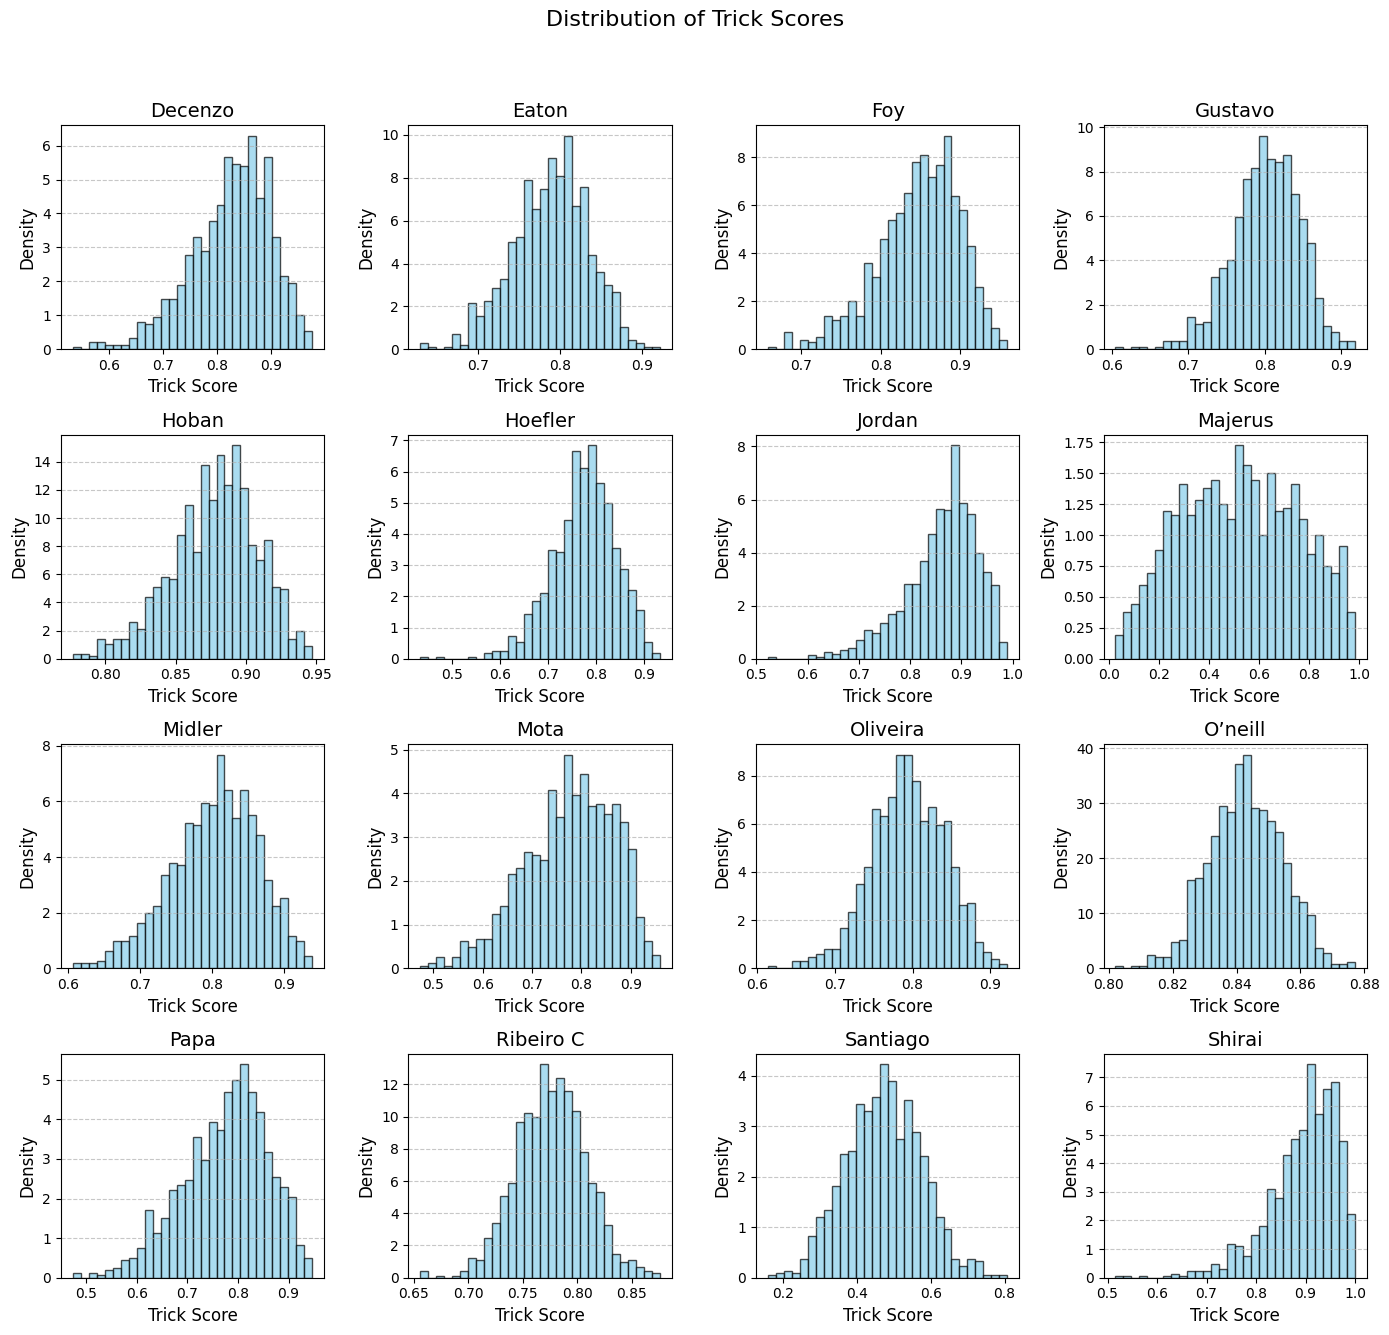

In [155]:
import matplotlib.pyplot as plt
import numpy as np

#----------------------------------
#Arsenal to choose from:
#----------------------------------
#results_df_Moment_Estimators
#results_df_Gradient_Descent
#results_df_Newton_Raphson
#----------------------------------

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(14, 14))

# Flatten the axes array to iterate over it
axes = axes.flatten()

for index, row in results_df_Moment_Estimators.iterrows():
    samps = np.random.beta(row['alpha_trick'], row['beta_trick'], size=1000)
    
    # Get the current subplot
    ax = axes[index]
    
    # Plot the histogram on the current subplot
    ax.hist(samps, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(row['id'], fontsize=14)
    ax.set_xlabel('Trick Score', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any remaining empty subplots
for i in range(len(results_df_Moment_Estimators), len(axes)):
    axes[i].axis('off')

fig.suptitle('Distribution of Trick Scores', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()


## (c) Propose a model for $Y_i$ and provide a point estimate for the parameters of your model. 

### ANALYTICAL ANSWER:

### NUMERICAL ANSWER:

#### Obtaining all the runs for a unique ID.

In [126]:
#Create all runs.
def aggregate_runs(runs):
    # This function aggregates the runs by filtering out zero values
    return list(runs[runs != 0])

# Assuming the runs are stored in columns named 'run1', 'run2', 'run3', etc.
run_columns = ['run 1', 'run 2']  # Add more columns if needed

# Group by 'id' and aggregate runs for each skateboarder
all_runs_df = df.melt(id_vars='id', value_vars=run_columns)\
                  .groupby('id')['value']\
                  .agg(aggregate_runs)\
                  .reset_index()

# Rename the columns for clarity
all_runs_df.columns = ['id', 'runs']

# Uncoment this to see the results.
all_runs_df

,id,runs
0,Decenzo,"[0.46, 0.83, 0.69, 0.31, 0.5, 0.58, 0.85, 0.54]"
1,Eaton,"[0.75, 0.69, 0.79, 0.72]"
2,Foy,"[0.54, 0.45, 0.1, 0.49, 0.59, 0.6]"
3,Gustavo,"[0.84, 0.16, 0.77, 0.59, 0.28, 0.12, 0.89, 0.8..."
4,Hoban,"[0.35, 0.75, 0.41, 0.51, 0.62, 0.9, 0.68, 0.78..."
5,Hoefler,"[0.79, 0.68, 0.85, 0.84, 0.69, 0.71, 0.03, 0.57]"
6,Jordan,"[0.73, 0.7, 0.84, 0.77, 0.26, 0.9, 0.9, 0.86, ..."
7,Majerus,"[0.4, 0.69, 0.09, 0.48]"
8,Midler,"[0.81, 0.8, 0.63, 0.74, 0.01, 0.68]"
9,Mota,"[0.38, 0.81, 0.34, 0.4, 0.38, 0.51]"


#### Using the Method of Moments:

In [134]:
Method_Moment_results_alpha_beta_df_runs = all_runs_df.copy()

In [137]:
for index, row in Method_Moment_results_alpha_beta_df_runs.iterrows():
    samps = np.array(row['runs'])
    
    alpha_beta = get_moment_estimators(samps)
    
    Method_Moment_results_alpha_beta_df_runs.at[index, 'alpha_run'] = round(alpha_beta[0],2)
    Method_Moment_results_alpha_beta_df_runs.at[index, 'beta_run'] = round(alpha_beta[1],2)

In [146]:
results_df_Moment_Estimators['alpha_run'] = Method_Moment_results_alpha_beta_df_runs['alpha_run']
results_df_Moment_Estimators['beta_run'] = Method_Moment_results_alpha_beta_df_runs['beta_run']
results_df_Moment_Estimators

,id,theta_average,alpha_trick,beta_trick,alpha_run,beta_run
0,Decenzo,0.437500,20.84,4.36,3.57,2.43
1,Eaton,0.625000,60.17,15.99,77.50,27.58
2,Foy,0.500000,42.85,7.56,2.85,3.32
3,Gustavo,0.400000,61.71,15.31,1.05,0.73
4,Hoban,0.400000,94.13,13.14,3.21,1.85
5,Hoefler,0.437500,27.77,8.03,1.45,0.80
6,Jordan,0.400000,20.07,3.17,3.17,1.08
7,Majerus,0.375000,1.77,1.66,1.21,1.71
8,Midler,0.333333,32.59,7.77,0.97,0.62
9,Mota,0.250000,15.74,4.44,3.30,3.72


#### Using the Gradient Descent:

In [148]:
Gradient_Descent_results_alpha_beta_df_runs = all_runs_df.copy()

In [149]:
for index, row in Gradient_Descent_results_alpha_beta_df_runs.iterrows():
    samps = np.array(row['runs'])
    
    alpha_beta = Gauss_Raphson_method(samps)
    
    Gradient_Descent_results_alpha_beta_df_runs.at[index, 'alpha_run'] = round(alpha_beta[0],2)
    Gradient_Descent_results_alpha_beta_df_runs.at[index, 'beta_run'] = round(alpha_beta[1],2)

In [150]:
results_df_Gradient_Descent['alpha_run'] = Gradient_Descent_results_alpha_beta_df_runs['alpha_run']
results_df_Gradient_Descent['beta_run'] = Gradient_Descent_results_alpha_beta_df_runs['beta_run']
results_df_Gradient_Descent

,id,theta_average,alpha_trick,beta_trick,alpha_run,beta_run
0,Decenzo,0.437500,20.84,4.36,3.91,2.66
1,Eaton,0.625000,60.17,16.00,77.48,27.64
2,Foy,0.500000,42.85,7.56,2.80,3.46
3,Gustavo,0.400000,61.71,15.31,1.57,1.18
4,Hoban,0.400000,94.13,13.14,3.63,2.09
5,Hoefler,0.437500,27.77,8.03,1.41,1.02
6,Jordan,0.400000,20.07,3.18,4.05,1.53
7,Majerus,0.375000,1.80,1.68,1.68,2.48
8,Midler,0.333333,32.59,7.77,28.00,22.08
9,Mota,0.250000,15.75,4.45,3.61,3.91


#### Using the Gauss-Raphson method:

In [127]:
Newton_Raphson_results_alpha_beta_df_runs = all_runs_df.copy()

In [139]:
for index, row in Newton_Raphson_results_alpha_beta_df_runs.iterrows():
    samps = np.array(row['runs'])
    
    alpha_beta = Gauss_Raphson_method(samps)
    
    Newton_Raphson_results_alpha_beta_df_runs.at[index, 'alpha_run'] = round(alpha_beta[0],2)
    Newton_Raphson_results_alpha_beta_df_runs.at[index, 'beta_run'] = round(alpha_beta[1],2)

In [140]:
results_df_Newton_Raphson['alpha_run'] = Newton_Raphson_results_alpha_beta_df_runs['alpha_run']
results_df_Newton_Raphson['beta_run'] = Newton_Raphson_results_alpha_beta_df_runs['beta_run']
results_df_Newton_Raphson

,id,theta_average,alpha_trick,beta_trick,alpha_run,beta_run
0,Decenzo,0.437500,20.84,4.41,3.91,2.66
1,Eaton,0.625000,60.15,16.06,77.48,27.64
2,Foy,0.500000,42.84,7.64,2.80,3.46
3,Gustavo,0.400000,61.71,15.33,1.57,1.18
4,Hoban,0.400000,94.12,13.21,3.63,2.09
5,Hoefler,0.437500,27.75,8.08,1.41,1.02
6,Jordan,0.400000,20.06,3.36,4.05,1.53
7,Majerus,0.375000,3.01,2.73,1.68,2.48
8,Midler,0.333333,32.56,7.89,28.00,22.08
9,Mota,0.250000,15.73,4.58,3.61,3.91


#### Graphical representation

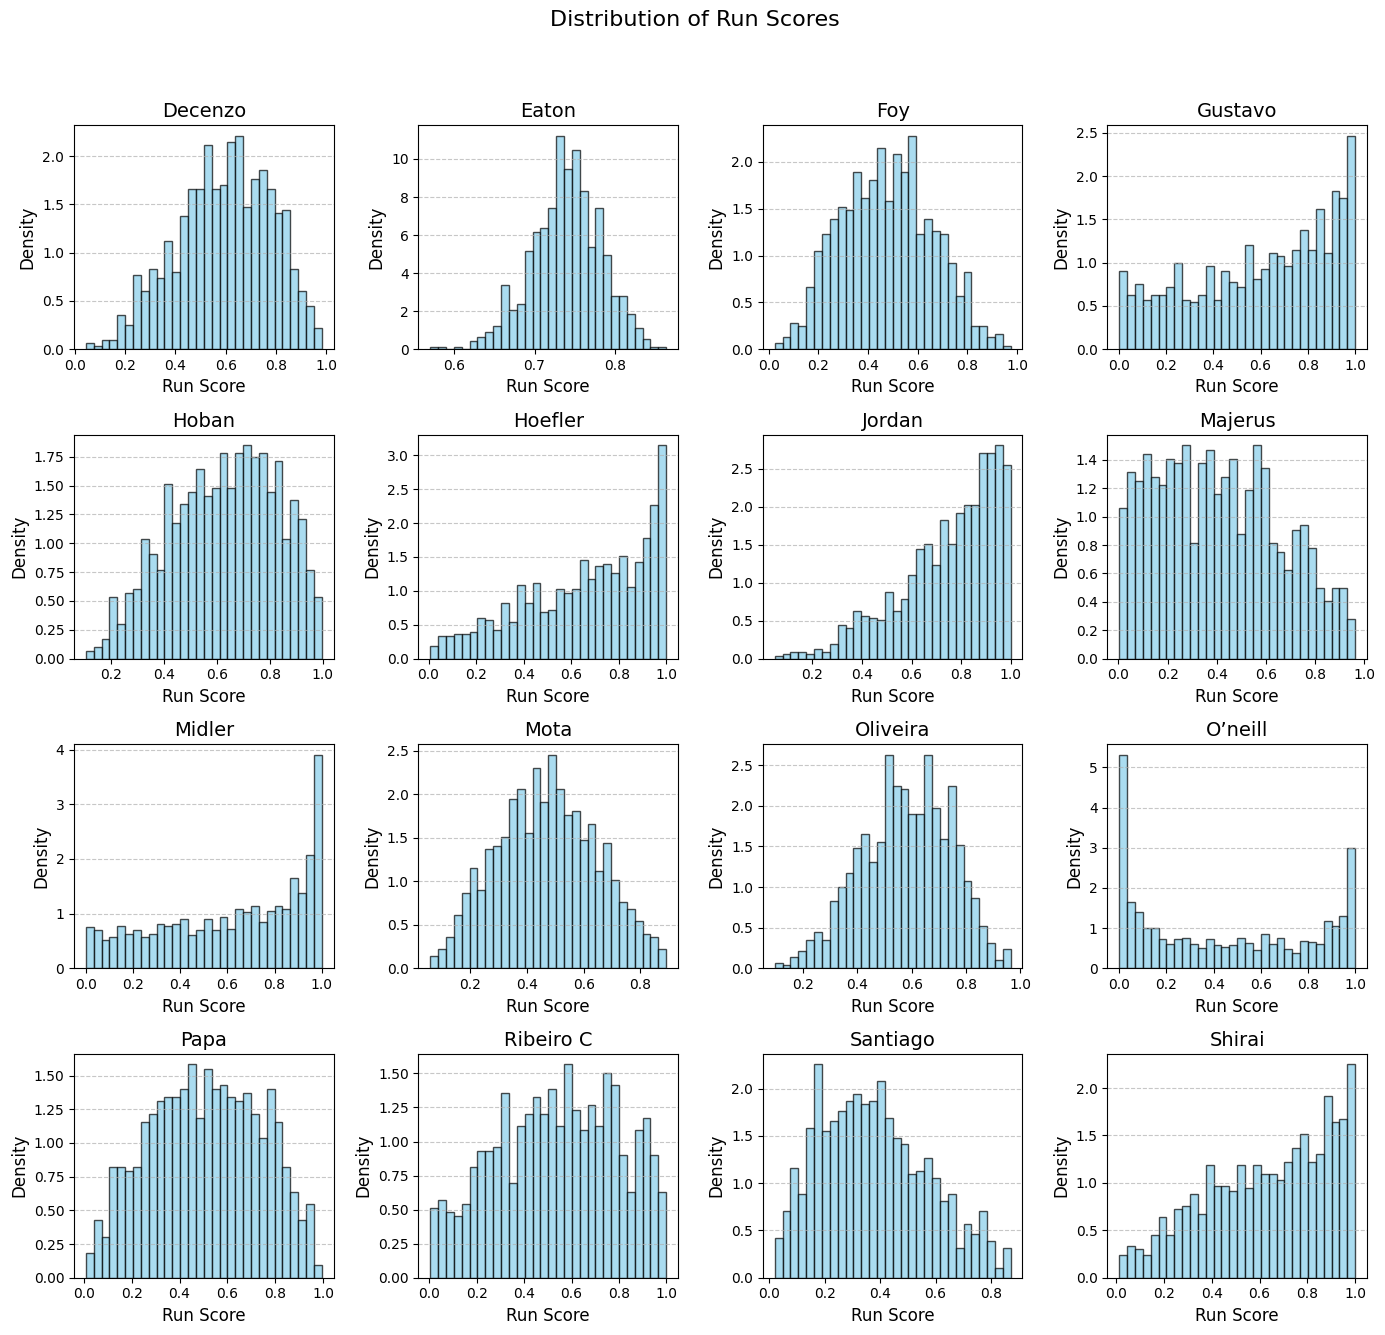

In [154]:
import matplotlib.pyplot as plt
import numpy as np

#----------------------------------
#Arsenal to choose from:
#----------------------------------
#results_df_Moment_Estimators
#results_df_Gradient_Descent
#results_df_Newton_Raphson
#----------------------------------


# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(14, 14))

# Flatten the axes array to iterate over it
axes = axes.flatten()

for index, row in results_df_Moment_Estimators.iterrows():
    samps = np.random.beta(row['alpha_run'], row['beta_run'], size=1000)
    
    # Get the current subplot
    ax = axes[index]
    
    # Plot the histogram on the current subplot
    ax.hist(samps, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(row['id'], fontsize=14)
    ax.set_xlabel('Run Score', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any remaining empty subplots
for i in range(len(results_df_Moment_Estimators), len(axes)):
    axes[i].axis('off')

fig.suptitle('Distribution of Run Scores', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()

## (d) Simulate LCQs

Use your model for $[X_i, Y_i]^T$ to simulate $5000$ LCQs and for each simulation extract the four skateboarders $\mathbf{W} = [W_1, W_2, W_3, W_4]^T$ with the highest total scores. 
- What is the mode for $W_1, \ldots, W_{5000}$? 

The actual winners for the LCQ are Gustavo, Hoban, Eaton, and Decenzo. 

- How many of the actual winners are predicted by the mode? 
- What is the estimated probability of the actual winners based on your simulations? 
- By the mode?

### Simulation Code

#### All the small functions:

In [34]:
def successful_trick(theta):
    made=bool(np.random.binomial(1, theta))
    return made

In [35]:
def trick_score(alpha, beta):
    return stats.beta.rvs(alpha, beta, size=1)[0]

In [36]:
def run_score(alpha, beta):
    return stats.beta.rvs(alpha, beta, size=1)[0]

In [37]:
def total_score(trick_scores, run_scores):
    return max(run_scores) + sorted(trick_scores)[-1] + sorted(trick_scores)[-2]

In [38]:
def sort_my_df(new_lcq_df):
    sorted_df = new_lcq_df.sort_values(by='total score', ascending=False)
    return sorted_df

In [39]:
def simulate_lcq(chosen_results_df):
    new_lcq_df = pd.DataFrame(columns=["id", "run 1", "run 2", "trick 1", "trick 2", "trick 3", "trick 4"])
    
    for index, row in chosen_results_df.iterrows():
        
        theta_average=row['theta_average']
        alpha_trick=row['alpha_trick']
        beta_trick=row['beta_trick']    
        alpha_run=row['alpha_run']
        beta_run=row['beta_run']
        
        new_lcq_df.at[index, "id"]=row['id']
        
        for _ in range(4):
            if successful_trick(theta_average):
                trick=trick_score(alpha_trick, beta_trick)
            else:
                trick=0
            new_lcq_df.at[index, f"trick {_+1}"] = round(trick,1)
        
        for _ in range(2):
            run=run_score(alpha_run, beta_run)
            new_lcq_df.at[index, f"run {_+1}"] = round(run,1)
        
        total_score_value=total_score(new_lcq_df.loc[index, ['trick 1', 'trick 2', 'trick 3', 'trick 4']], new_lcq_df.loc[index, ['run 1', 'run 2']]) 
        new_lcq_df.at[index, "total score"]=round(total_score_value,1)
    
    return new_lcq_df

In [40]:
def find_top_four_skateboarders(new_lcq_df):
    return sort_my_df(new_lcq_df).head(4)

#### Simulation for mode:
- Look at Jordan and Shirai, figure out why?

In [171]:
# Moment Estimators #
#----------------------------------
#results_df_Gradient_Descent
#results_df_Newton_Raphson
#----------------------------------

top_four_rankings_Moment_Estimators = []  # Initialize the main list

for _ in range(5000):
    top_four_df = find_top_four_skateboarders(simulate_lcq(results_df_Moment_Estimators))
    
    # Extract IDs of the top four skateboarders and append them to the main list
    top_four_ids = top_four_df['id'].tolist()[:4]
    top_four_rankings_Moment_Estimators.append(top_four_ids)

In [172]:
# Transpose the list
transposed_rankings_Moment_Estimators = list(zip(*top_four_rankings_Moment_Estimators))
transposed_rankings = list(zip(*top_four_rankings_Moment_Estimators))
transposed_rankings = list(zip(*top_four_rankings_Moment_Estimators))

# Calculate mode for each position
modes_Moment_Estimators = [mode(rank) for rank in transposed_rankings_Moment_Estimators]

In [163]:
# Gradient Descent #
#----------------------------------

top_four_rankings_Gradient_Descent = []  # Initialize the main list

for _ in range(5000):
    top_four_df = find_top_four_skateboarders(simulate_lcq(results_df_Gradient_Descent))
    
    # Extract IDs of the top four skateboarders and append them to the main list
    top_four_ids = top_four_df['id'].tolist()[:4]
    top_four_rankings_Gradient_Descent.append(top_four_ids)

In [166]:
# Transpose the list
transposed_rankings_Gradient_Descent = list(zip(*top_four_rankings_Gradient_Descent))
transposed_rankings = list(zip(*top_four_rankings_Gradient_Descent))
transposed_rankings = list(zip(*top_four_rankings_Gradient_Descent))

# Calculate mode for each position
modes_Gradient_Descent = [mode(rank) for rank in transposed_rankings_Gradient_Descent]

In [167]:
# Newton Raphson #
#----------------------------------

top_four_rankings_Newton_Raphson = []  # Initialize the main list

for _ in range(5000):
    top_four_df = find_top_four_skateboarders(simulate_lcq(results_df_Newton_Raphson))
    
    # Extract IDs of the top four skateboarders and append them to the main list
    top_four_ids = top_four_df['id'].tolist()[:4]
    top_four_rankings_Newton_Raphson.append(top_four_ids)

In [169]:
# Transpose the list
transposed_rankings_Newton_Raphson = list(zip(*top_four_rankings_Newton_Raphson))
transposed_rankings = list(zip(*top_four_rankings_Newton_Raphson))
transposed_rankings = list(zip(*top_four_rankings_Newton_Raphson))

# Calculate mode for each position
modes_Newton_Raphson = [mode(rank) for rank in transposed_rankings_Newton_Raphson]

In [173]:
print("For Moment Estimators:", modes_Moment_Estimators)
print("For Gradient Descent:", modes_Gradient_Descent)
print("For Newton Raphson:", modes_Newton_Raphson)

For Moment Estimators: ['Jordan', 'Hoban', 'Eaton', 'Eaton']
For Gradient Descent: ['Jordan', 'Eaton', 'Eaton', 'Eaton']
For Newton Raphson: ['Jordan', 'Eaton', 'Eaton', 'Eaton']


The actual winners for the LCQ are Gustavo, Hoban, Eaton, and Decenzo.

#### Using the dictionary to see the rankings:
- Look at Jordan and Shirai, figure out why?

In [176]:
#results_df_Moment_Estimators
#----------------------------------
point_counts_Moment_Estimators = {}

for _ in range(5000):
    top_four_df = find_top_four_skateboarders(simulate_lcq(results_df_Moment_Estimators))
    
    # Loop through the top 4 skateboarders and award them a point
    for i in range(4):
        skateboarder_id = top_four_df.iloc[i]['id']
        point_counts_Moment_Estimators[skateboarder_id] = point_counts_Moment_Estimators.get(skateboarder_id, 0) + 1

df_point_counts = pd.DataFrame(list(point_counts_Moment_Estimators.items()), columns=['id', 'points'])
df_ranked_Moment_Estimators = df_point_counts.sort_values(by='points', ascending=False)

df_ranked_Moment_Estimators

,id,points
8,Eaton,2758
0,Jordan,2312
10,Hoban,2143
9,Shirai,2120
3,Decenzo,1888
1,Hoefler,1667
6,Gustavo,1580
12,Foy,1388
7,Midler,1233
2,Papa,830


In [177]:
#results_df_Gradient_Descent
#----------------------------------

point_counts_Gradient_Descent = {}

for _ in range(5000):
    top_four_df = find_top_four_skateboarders(simulate_lcq(results_df_Gradient_Descent))
    
    # Loop through the top 4 skateboarders and award them a point
    for i in range(4):
        skateboarder_id = top_four_df.iloc[i]['id']
        point_counts_Gradient_Descent[skateboarder_id] = point_counts_Gradient_Descent.get(skateboarder_id, 0) + 1

df_point_counts = pd.DataFrame(list(point_counts_Gradient_Descent.items()), columns=['id', 'points'])
df_ranked_Gradient_Descent = df_point_counts.sort_values(by='points', ascending=False)

df_ranked_Gradient_Descent

,id,points
1,Eaton,3095
4,Jordan,2403
6,Hoban,2298
7,Shirai,2150
0,Decenzo,2114
3,Foy,1558
5,Gustavo,1484
8,Hoefler,1484
2,Oliveira,922
9,Papa,818


In [178]:
#results_df_Newton_Raphson
#----------------------------------

point_counts_Newton_Raphson = {}

for _ in range(5000):
    top_four_df = find_top_four_skateboarders(simulate_lcq(results_df_Newton_Raphson))
    
    # Loop through the top 4 skateboarders and award them a point
    for i in range(4):
        skateboarder_id = top_four_df.iloc[i]['id']
        point_counts_Newton_Raphson[skateboarder_id] = point_counts_Newton_Raphson.get(skateboarder_id, 0) + 1

df_point_counts = pd.DataFrame(list(point_counts_Newton_Raphson.items()), columns=['id', 'points'])
df_ranked_Newton_Raphson = df_point_counts.sort_values(by='points', ascending=False)

df_ranked_Newton_Raphson

,id,points
5,Eaton,3201
2,Hoban,2298
0,Jordan,2292
6,Decenzo,2114
4,Shirai,2083
8,Foy,1564
7,Gustavo,1561
3,Hoefler,1484
13,Oliveira,940
12,Papa,805


#### RESULTS:


---

***Using Mode for all 3 results dataframes:***

In [179]:
print("For Moment Estimators:", modes_Moment_Estimators)
print("For Gradient Descent:", modes_Gradient_Descent)
print("For Newton Raphson:", modes_Newton_Raphson)

For Moment Estimators: ['Jordan', 'Hoban', 'Eaton', 'Eaton']
For Gradient Descent: ['Jordan', 'Eaton', 'Eaton', 'Eaton']
For Newton Raphson: ['Jordan', 'Eaton', 'Eaton', 'Eaton']


The actual winners for the LCQ are Gustavo, Hoban, Eaton, and Decenzo. 


---

***Using Moment Estimators***

In [187]:
df_ranked_Moment_Estimators['rank'] = df_ranked_Moment_Estimators['points'].rank(ascending=False)
df_ranked_Moment_Estimators

,id,points,rank
0,Eaton,2758,1.0
1,Jordan,2312,2.0
2,Hoban,2143,3.0
3,Shirai,2120,4.0
4,Decenzo,1888,5.0
5,Hoefler,1667,6.0
6,Gustavo,1580,7.0
7,Foy,1388,8.0
8,Midler,1233,9.0
9,Papa,830,10.0


The actual winners for the LCQ are Gustavo, Hoban, Eaton, and Decenzo. 


---

***Using Gradient Descent***

In [189]:
df_ranked_Gradient_Descent['rank'] = df_ranked_Gradient_Descent['points'].rank(ascending=False)
df_ranked_Gradient_Descent

,id,points,rank
1,Eaton,3095,1.0
4,Jordan,2403,2.0
6,Hoban,2298,3.0
7,Shirai,2150,4.0
0,Decenzo,2114,5.0
3,Foy,1558,6.0
5,Gustavo,1484,7.5
8,Hoefler,1484,7.5
2,Oliveira,922,9.0
9,Papa,818,10.0


The actual winners for the LCQ are Gustavo, Hoban, Eaton, and Decenzo. 


---

***Using Newton Raphson***

In [190]:
df_ranked_Newton_Raphson['rank'] = df_ranked_Newton_Raphson['points'].rank(ascending=False)
df_ranked_Newton_Raphson

,id,points,rank
5,Eaton,3201,1.0
2,Hoban,2298,2.0
0,Jordan,2292,3.0
6,Decenzo,2114,4.0
4,Shirai,2083,5.0
8,Foy,1564,6.0
7,Gustavo,1561,7.0
3,Hoefler,1484,8.0
13,Oliveira,940,9.0
12,Papa,805,10.0


The actual winners for the LCQ are Gustavo, Hoban, Eaton, and Decenzo. 

# 3. Bayesian Model

## Problem Statment:
As an alternative to the frequentist model developed in Task 2, we can consider a Bayesian model.
$$
\Theta_i \perp A_i, B_i
$$
$$
f_{\Theta_i, A_i, B_i}\left(\theta_i, \alpha_i, \beta_i\right)=f_{\Theta_i}\left(\theta_i\right) f_{A_i, B_i}\left(\alpha_i, \beta_i\right)
$$

In [ ]:
#Get Data
initial_bayesian_df_tricks = all_tricks_df_with_zeroes.copy()[all_tricks_df_with_zeroes['id'].isin(contestants)]

initial_bayesian_df_tricks['theta_average'] = results_df['theta_average']
initial_bayesian_df_tricks['alpha_trick'] = results_df['alpha_trick']
initial_bayesian_df_tricks['beta_trick'] = results_df['beta_trick']

# Uncoment this to see the results.
initial_bayesian_df_tricks

,id,tricks,theta_average,alpha_trick,beta_trick
0,Decenzo,"[0.78, 0.86, 0.87, 0.0, 0.0, 0.0, 0.0, 0.86, 0...",0.437500,20.84,4.41
1,Eaton,"[0.75, 0.0, 0.84, 0.84, 0.77, 0.75, 0.0, 0.0]",0.625000,60.15,16.06
2,Foy,"[0.8, 0.0, 0.79, 0.83, 0.9, 0.0, 0.88, 0.9, 0....",0.500000,42.84,7.64
3,Gustavo,"[0.83, 0.0, 0.77, 0.8, 0.8, 0.74, 0.0, 0.0, 0....",0.400000,61.71,15.33
4,Hoban,"[0.0, 0.82, 0.91, 0.86, 0.86, 0.0, 0.92, 0.89,...",0.400000,94.12,13.21
5,Hoefler,"[0.0, 0.85, 0.73, 0.78, 0.67, 0.0, 0.0, 0.0, 0...",0.437500,27.75,8.08
6,Jordan,"[0.0, 0.0, 0.84, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.400000,20.06,3.36
7,Majerus,"[0.79, 0.4, 0.0, 0.0, 0.0, 0.0, 0.36, 0.0]",0.375000,3.01,2.73
8,Midler,"[0.0, 0.79, 0.0, 0.0, 0.0, 0.73, 0.87, 0.0, 0....",0.333333,32.56,7.89
9,Mota,"[0.78, 0.0, 0.69, 0.0, 0.87, 0.0, 0.0, 0.0, 0....",0.250000,15.73,4.58


## Useful videos

<iframe width="560" height="315" src="https://www.youtube.com/embed/0F0QoMCSKJ4?si=w7JY36TpygsHr_r2" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

<iframe width="560" height="315" src="https://www.youtube.com/embed/OTO1DygELpY?si=o--yk03nV36-5p7o" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

<iframe width="560" height="315" src="https://www.youtube.com/embed/0lpT-yveuIA?si=i_yIc54L-IBub6tV" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## (a) 
Propose a joint prior distribution for the parameters $[\Theta_i, A_i, B_i]^T$ for $X_i$ where we assume $\Theta_i \perp A_i, B_i$ for all $i$. 


### Prior for $\Theta_i$:

   
- $\Theta_i$ represents the average value of a skateboarder landing a trick. 
- Since $\Theta_i$ is an average value, it will lie between 0 and 1. 
- A natural choice for a prior distribution for a parameter that lies between 0 and 1 is the Beta distribution since it is defined on the interval [0,1]. 

If we use a non-informative prior, no strong beliefs about the distribution of $\Theta_i$ before observing the data. 
A common choice, according to the notes, would be $Beta(1,1)$, which is equivalent to a uniform distribution on [0,1].

$$
f_{\Theta_i}\left(\theta_i\right)=\operatorname{Beta}\left(\theta_i ; 1,1\right)=U(0,1)
$$


### Prior for  $A_i$, $B_i$:

- Since $A_i$, $B_i$ are are parameters for a distribution that produces results between 0 and 1, a natural choice for their prior distribution is the Beta distribution.

## (b) 
Generate 5000 random samples from the posterior distribution
$$
f_{\Theta_i, \alpha_i, \beta_i | \boldsymbol{X}_i}(\theta_i, \alpha_i, \beta_i | \boldsymbol{x}_i) .
$$
Plot your resulting samples for the marginal posterior distributions:
$$
f_{\theta_i | \boldsymbol{X}_i}(\theta_i | \boldsymbol{x}_i) \quad \text{and} \quad f_{\alpha_i, \beta_i | \boldsymbol{X}_i}(\alpha_i, \beta_i | \boldsymbol{x}_i) .
$$

- Here we do integrals... for theta fuble integral for A and B from 0 to infinity and for A and B single integral from 0 to 1 with respect to theta
- Calculate the posterior sample mean and the posterior sample variance for each parameter $ \theta_i, \alpha_i $, and $ \beta_i $ for all skateboarders.


---

We know:
$$
X_i \mid \Theta_i=\theta_i, A_i=\alpha_i, B_i=\beta_i
$$


- $ \Theta_i$ represents the average value of a skateboarder landing a trick.
- $ A_i$ and $ B_i$ are parameters for a distribution.

We are interested in the behavior or distribution of $ X_i$, the observed data for skateboarder $ i$, when the parameters $\Theta_i$, $ A_i$, and $ B_i$ are fixed at specific values.

Given the above, the joint prior distribution for $\theta_i, A_i$, and $B_i$ is:
$$
f_{\Theta_i, A_i, B_i}\left(\theta_i, \alpha_i, \beta_i\right)=f_{\Theta_i}\left(\theta_i\right)  f_{A_i, B_i}\left(\alpha_i, \beta_i\right)
$$

Given the likelihood $f_{\mathbb{X} \mid \Theta_i A_i, B_i}\left(x \mid \theta_i, \alpha_i, \beta_i\right)$, the posterior distribution is:
$$
f_{\Theta_i, A_i, B_i \mid \boldsymbol{X}_i}\left(\theta_i, \alpha_i, \beta_i \mid \boldsymbol{x}_i\right) \propto f_{\Theta_i, A_i, B_i}\left(\theta_i, \alpha_i, \beta_i\right) f_{\mathbb{X} \mid \Theta_i A_i, B_i}\left(x \mid \theta_i, \alpha_i, \beta_i\right)
$$
$$
f_{\Theta_i, A_i, B_i \mid \boldsymbol{X}_i}\left(\theta_i, \alpha_i, \beta_i \mid \boldsymbol{x}_i\right) \propto f_{\Theta_i}\left(\theta_i\right)  f_{A_i, B_i}\left(\alpha_i, \beta_i\right) f_{\mathbb{X} \mid \Theta_i A_i, B_i}\left(x \mid \theta_i, \alpha_i, \beta_i\right)
$$
We can use Metropolis Algorithm on this part: 

$$
f_{\Theta_i, A_i, B_i}\left(\theta_i, \alpha_i, \beta_i\right) f_{\mathbb{X} \mid \Theta_i A_i, B_i}\left(\mathbb{x} \mid \theta_i, \alpha_i, \beta_i\right)
$$

### First try (wrong)

$$
f_{\Theta_i, A_i, B_i \mid \boldsymbol{X}_i}\left(\theta_i, \alpha_i, \beta_i \mid \boldsymbol{x}_i\right) \propto f_{\Theta_i}\left(\theta_i\right) f_{A_i, B_i}\left(\alpha_i, \beta_i\right) f_{\mathbb{X} \mid \Theta_i A_i, B_i}\left(x \mid \theta_i, \alpha_i, \beta_i\right)
$$

$$
f_{\Theta_i, A_i, B_i}(\theta_i, \alpha_i, \beta_i)=\left(\frac{1}{\bar{B}\left(\alpha_\theta, \beta_\theta\right)} \theta^{\alpha_\theta-1}(1-\theta)^{\beta_\theta-1}\right) \times(\alpha_i+\beta_i)^{-5 / 2}
$$

The likelihood is composed of two indicator functions $\mathbf{1}_{\boldsymbol{x}=\mathbf{0}}$ and $\mathbf{1}_{\boldsymbol{x}=\mathbf{1}}$, so we are going to have two posterior distributions: One where $x=0$ and one for $x>0$. 

- For $x>0$ we get: 

$$
f_{\Theta, A, B  \mid \boldsymbol{X}}(\theta, \alpha, \beta  \mid \boldsymbol{x})=\left(\frac{1}{B\left(\alpha_\theta, \beta_\theta\right)} \theta^{\alpha_\theta-1}(1-\theta)^{\beta_\theta-1}\right) (\alpha+\beta)^{-5 / 2} \left(\prod_{i=1}^n \theta  \frac{1}{B\left(\alpha_i, \beta_i\right)} z_i^{\alpha_i-1}\left(1-z_i\right)^{\beta_i-1}\right)
$$

- The parameters $\alpha_\theta$ and $\beta_\theta$ are the hyperparameters of the Beta distribution for $\theta$, since I assume that $\theta$ is Beta($\theta_i$, 1, 1)=$U(0,1)$, this would mean $\alpha_\theta=1$ and $\beta_\theta=1$.
- In this part $(\alpha+\beta)^{-5 / 2}$, my initial guess for $\alpha$ and $\beta$ is by moment method for the whole population.
- In this part $\left(\prod_{i=1}^n \theta \frac{1}{B\left(\alpha_i, \beta_i\right)} z_i^{\alpha_i-1}\left(1-z_i\right)^{\beta_i-1}\right)$, we use data from Part II.

For $\theta \sim \operatorname{Beta}(1,1)$, the log PDF is:
$$
\log f_{\Theta_i}\left(\theta_i\right)=\log \left(\frac{\Gamma(1+1)}{\Gamma(1) \Gamma(1)} \theta_i^{1-1}\left(1-\theta_i\right)^{1-1}\right)
$$
Since $\Gamma(1)=1$, the log PDF simplifies to:
$$
\log f_{\Theta_i}\left(\theta_i\right)=\log \left(\theta_i\right)+\log \left(1-\theta_i\right)
$$

$$(\alpha+\beta)^{-5 / 2}$$
$$
-\frac{5}{2} \log (\alpha+\beta)
$$

$$
\log \left(\theta_i\right)+\log \left(1-\theta_i\right) -\frac{5}{2} \log (\alpha+\beta)
$$

$$
\prod_{i=1}^n \theta \frac{1}{B\left(\alpha_i, \beta_i\right)} z_i^{\alpha_i-1}\left(1-z_i\right)^{\beta_i-1}
$$
$$
\sum_{i=1}^n \log \left(\theta \frac{1}{B\left(\alpha_i, \beta_i\right)} z_i^{\alpha_i-1}\left(1-z_i\right)^{\beta_i-1}\right)
$$
$$
\sum_{i=1}^n\left(\log (\theta)+\log \left(\frac{1}{B\left(\alpha_i, \beta_i\right)}\right)+\log \left(z_i^{\alpha_i-1}\right)+\log \left(\left(1-z_i\right)^{\beta_i-1}\right)\right)
$$
$$
\sum_{i=1}^n \log (\theta)+\sum_{i=1}^n \log \left(\frac{1}{B\left(\alpha_i, \beta_i\right)}\right)+\sum_{i=1}^n \log \left(z_i^{\alpha_i-1}\right)+\sum_{i=1}^n \log \left(\left(1-z_i\right)^{\beta_i-1}\right)
$$
$$
n \log (\theta)+\left(\sum_{i=1}^n \log \left(\frac{1}{B\left(\alpha_i, \beta_i\right)}\right)\right)+\left(\sum_{i=1}^n\left(\alpha_i-1\right) \log \left(z_i\right)\right) +\left(\sum_{i=1}^n\left(\beta_i-1\right) \log \left(1-z_i\right)\right)
$$

- Since  $\theta_i$, $\alpha_i$ and $\beta_i$ are the same for each contestant and only $z_i$ changes we can write: 
$$
n \log (\theta)+\left(\sum_{i=1}^n \log \left(\frac{1}{B\left(\alpha, \beta\right)}\right)\right)+\left(\sum_{i=1}^n\left(\alpha-1\right) \log \left(z_i\right)\right)+\left(\sum_{i=1}^n\left(\beta-1\right) \log \left(1-z_i\right)\right)
$$

### Second try

#### ANALYTICAL ANSWER:

##### Apriori $f_{\Theta_i}(\theta_i)$

- Assuming that the trick was landed, we can simply use $f_{\Theta_i}(\theta_i) = 1$.
- This will greatly simplify our equation!

##### Apriori $f_{A, B}(\alpha, \beta)$

We can use reparametrization for $f_{A, B}(\alpha, \beta)$:

$$
\mu=\frac{\alpha}{\alpha+\beta} \quad \text { och } \quad \kappa=\alpha+\beta+1
$$
To see that $\kappa$ is a measure of precision, note that for $X \sim \operatorname{Beta}(\alpha, \beta)$,

$$
\operatorname{Var}[X]=\frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}=\frac{\mu(1-\mu)}{\kappa} ;
$$

i.e., $\kappa$ is inversely proportional to $\operatorname{Var}[X]$.
- We can then specify a prior distribution for $[\mu, \kappa]^{\mathrm{T}}$ and take a transformation of stochastic variables to obtain a prior distribution for $[\alpha, \beta]^{\mathrm{T}}$. 
- We form a conditional prior distribution for $[\mu, \kappa]^{\mathrm{T}}$ according to the factorization

$$
(\mu, \kappa)=(\kappa \mid \mu) f(\mu)
$$

where we take

$$
\begin{aligned}
\kappa \mid \mu & \sim \operatorname{Gamma}(\theta, \lambda), \\
\mu & \sim \mathrm{U}(0,1) .
\end{aligned}
$$

This gives us the distribution

$$
f_{A, B}(\alpha, \beta)=\frac{\lambda^\theta}{\Gamma(\theta)}(\alpha+\beta+1)^{\theta-1} e^{-\lambda(\alpha+\beta+1)}(\alpha+\beta)^{-1}
$$


##### Data distirbution $f_{\mathbb{X} \mid \Theta_i A_i, B_i}\left(x \mid \theta_i, \alpha_i, \beta_i\right)$

We know from the problem statement that:
$$
f_{X_i}\left(x_i \mid \theta_i, \alpha_i, \beta_i\right)=\left(1-\theta_i\right) \mathbf{1}_{x_i=0}+\theta_i f_{Z_i}\left(z_i\right)
$$
We substitute in the $Beta(\alpha_i, \beta_i)$:
$$
f_{X_i}\left(x_i \mid \theta_i, \alpha_i, \beta_i\right)=\left(1-\theta_i\right) \mathbf{1}_{x_i=0}+\theta_i \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)+\Gamma(\beta)} z_i^{\alpha-1}(1-z)^{\beta-1}\mathbf{1}_{x_i \neq 0}
$$

##### Thus, if we combine everything $f_{\Theta_i, A_i, B_i \mid \boldsymbol{X}_i}\left(\theta_i, \alpha_i, \beta_i \mid \boldsymbol{x}_i\right) \propto f_{\Theta_i}\left(\theta_i\right)  f_{A_i, B_i}\left(\alpha_i, \beta_i\right) f_{\mathbb{X} \mid \Theta_i A_i, B_i}\left(x \mid \theta_i, \alpha_i, \beta_i\right)$:

$$
1\times \left(\frac{\lambda^{\theta_{hyper}}_{hyper}}{\Gamma(\theta_{hyper})}(\alpha+\beta+1)^{\theta_{hyper}-1} e^{-\lambda_{hyper}(\alpha+\beta+1)}(\alpha+\beta)^{-1}\right)\times\left( \left(1-\theta_i\right) \mathbf{1}_{x_i=0}+\theta_i \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)+\Gamma(\beta)} z_i^{\alpha-1}(1-z)^{\beta-1}\mathbf{1}_{x_i \neq 0}\right)
$$

- This appears quite complex to implement, so let's log everything.

##### log-ing everything:

$\log f_{A_j B_j }\left(\alpha_j, \beta_j \right)=$
$$
\theta_{hyper} \log (\lambda_{hyper})-\log (\Gamma(\theta_{hyper}))+(\theta_{hyper}-1) \log (\alpha+\beta+1)-\lambda_{hyper}(\alpha+\beta+1)-\log (\alpha+\beta)
$$
$\log f_{\mathbb{X} \mid \Theta_i A_i, B_i}\left(x \mid \theta_i, \alpha_i, \beta_i\right)=$
$$
\log(1-\theta) \cdot \mathbb{1}_{\{x_i=0\}} + \left(\log(\theta_i) + \log(\Gamma(\alpha+\beta)) - \log(\Gamma(\alpha)+\Gamma(\beta)) + (\alpha-1) \log(z_i) + (\beta-1) \log(1-z_i)\right)\mathbf{1}_{x_i \neq 0}.
$$

#### CODE:

##### Initial guesses:
- Initial parameter guess for the prior distributions can be obtained using the moment method for the entire population.

In [ ]:
#Note: merged_tricks is a list of all tricks including 0s
merged_tricks_with_zeroes = [item for sublist in initial_bayesian_df_tricks['tricks'] for item in sublist]
#print(merged_tricks_with_zeroes)
#print("the length of merged_tricks is: ", len(merged_tricks_with_zeroes))

#Note: merged_tricks_without_zeroes is a list of all tricks without 0s
merged_tricks_without_zeroes=[x for x in merged_tricks_with_zeroes if x != 0]
#print(merged_tricks_without_zeroes)
#print("the length of merged_tricks_without_zeroes is: ", len(merged_tricks_without_zeroes))

initial_guess_trick_with_zeroes=get_moment_estimators(merged_tricks_with_zeroes)
inital_guess_tricks_without_zeroes=get_moment_estimators(merged_tricks_without_zeroes)

#print(initial_guess_trick_with_zeroes)
print(inital_guess_tricks_without_zeroes)

[11.023834040652211, 2.585837614473971]


In [ ]:
from scipy.special import loggamma

def log_prior(alpha, beta, precision, lambda_hyper):
    theta_hyper = lambda_hyper*precision
    return   theta_hyper * np.log(lambda_hyper) - loggamma(theta_hyper) + (theta_hyper - 1) * np.log(alpha + beta + 1) - lambda_hyper * (alpha + beta + 1) - np.log(alpha + beta)

In [ ]:
#THIS IS OLD => FIRST TRY
#from scipy.special import gammaln
#
#def log_prior(alpha, beta, precision, lambda_hyper):
#    theta_hyper = lambda_hyper * precision
#    return theta_hyper * np.log(lambda_hyper) - gammaln(theta_hyper) + (theta_hyper - 1) * np.log(alpha + beta + 1) - lambda_hyper * (alpha + beta + 1) - np.log(alpha + beta)

In [ ]:
from scipy.special import loggamma

def log_posterior(alpha, beta, theta, data):
    precision = 5
    lambda_hyper = 0.5

    log_p = log_prior(alpha, beta, precision, lambda_hyper)

    for z_i in data:
        
        if z_i == 0:
            log_p += np.log(1 - theta)
        else:
            log_p += np.log(theta) + loggamma(alpha + beta) - loggamma(alpha) - loggamma(beta) + (alpha - 1) * np.log(z_i) + (beta-1) * np.log(1 - z_i)
            
    return log_p

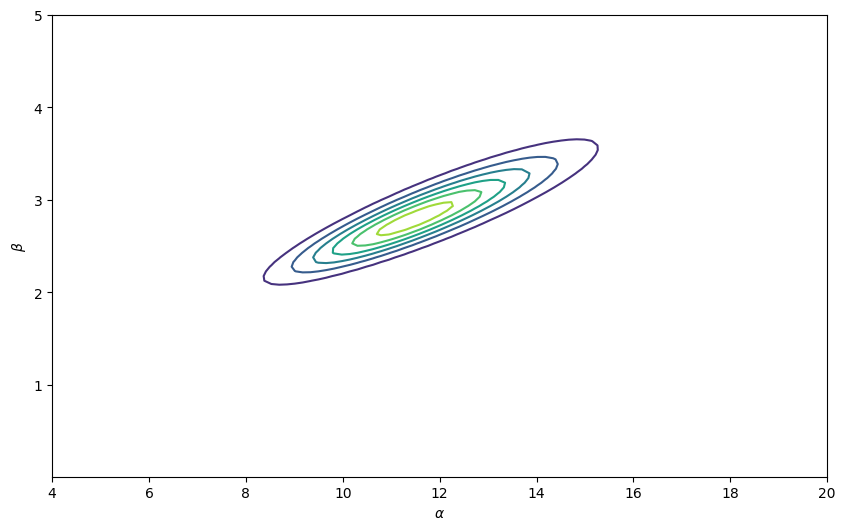

In [ ]:
data=merged_tricks_with_zeroes
alpha_grid = np.linspace(4, 20, 100)
beta_grid = np.linspace(0.01, 5, 100)
theta=0.5

log_posterior_grid = [[log_posterior(alpha, beta, theta, data) for alpha in alpha_grid] for beta in beta_grid]

# För att undvika underflow när vi exponentierar log-täthetsfunktionen subtraherar vi först det största värdet,
# vilket gör att det största värdet efter exponentiering alltid är ett.
posterior_grid = np.exp(log_posterior_grid - np.max(log_posterior_grid))

plt.figure(figsize=(10, 6))
plt.contour(alpha_grid, beta_grid, posterior_grid)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.show()

##### Metropolis algorithm alternative 1:

In [ ]:
def metropolis_algorithm_alt1(data, num_samples=10000):
    # Initial Candidates
    theta = 0.5
    alpha = inital_guess_tricks_without_zeroes[0]
    beta = inital_guess_tricks_without_zeroes[1]

    params = []

    for _ in range(num_samples):
        # Propose new candidates
        theta_new = np.random.uniform(0, 1)
        alpha_new = abs(np.random.normal(alpha, 0.5))
        beta_new = abs(np.random.normal(beta, 0.5))

        # Calculate acceptance ratio
        log_ratio = (log_posterior(alpha_new, beta_new, theta_new, data) - 
                     log_posterior(alpha, beta, theta, data))

        # Acceptance criterion
        if np.log(np.random.uniform(0, 1)) < log_ratio:
            theta = theta_new
            alpha = alpha_new
            beta = beta_new

        params.append((theta, alpha, beta))

    return params

In [ ]:
initial_bayesian_df_tricks = initial_bayesian_df_tricks.assign(params=None)

for index, row in initial_bayesian_df_tricks.iterrows():
    
    data = np.array(row['tricks'])
    params=metropolis_algorithm_alt1(data)
    
    initial_bayesian_df_tricks.at[index, 'params'] = params
    
initial_bayesian_df_tricks['theta_metropolis'] = initial_bayesian_df_tricks['params'].apply(lambda x: x[-1][0])
initial_bayesian_df_tricks['alpha_metropolis'] = initial_bayesian_df_tricks['params'].apply(lambda x: x[-1][1])
initial_bayesian_df_tricks['betha_metropolis'] = initial_bayesian_df_tricks['params'].apply(lambda x: x[-1][2])


print (initial_bayesian_df_tricks[['id','theta_average', 'theta_metropolis', 'alpha_metropolis', 'betha_metropolis']])


           id  theta_average  theta_metropolis  alpha_metropolis  \
0     Decenzo       0.437500          0.472681          2.842419   
1       Eaton       0.625000          0.530894          9.833541   
2         Foy       0.500000          0.555641          7.887081   
3     Gustavo       0.400000          0.265056          4.351806   
4       Hoban       0.400000          0.642717         10.188761   
5     Hoefler       0.437500          0.495689          5.661669   
6      Jordan       0.400000          0.401729          5.996878   
7     Majerus       0.375000          0.339083          4.861148   
8      Midler       0.333333          0.348886          3.980798   
9        Mota       0.250000          0.174729          1.808143   
10   Oliveira       0.416667          0.608090          3.677148   
11    O’neill       0.250000          0.247316          2.783012   
12       Papa       0.437500          0.428973          5.727772   
13  Ribeiro C       0.250000          0.223420  

###### Graphical representation:

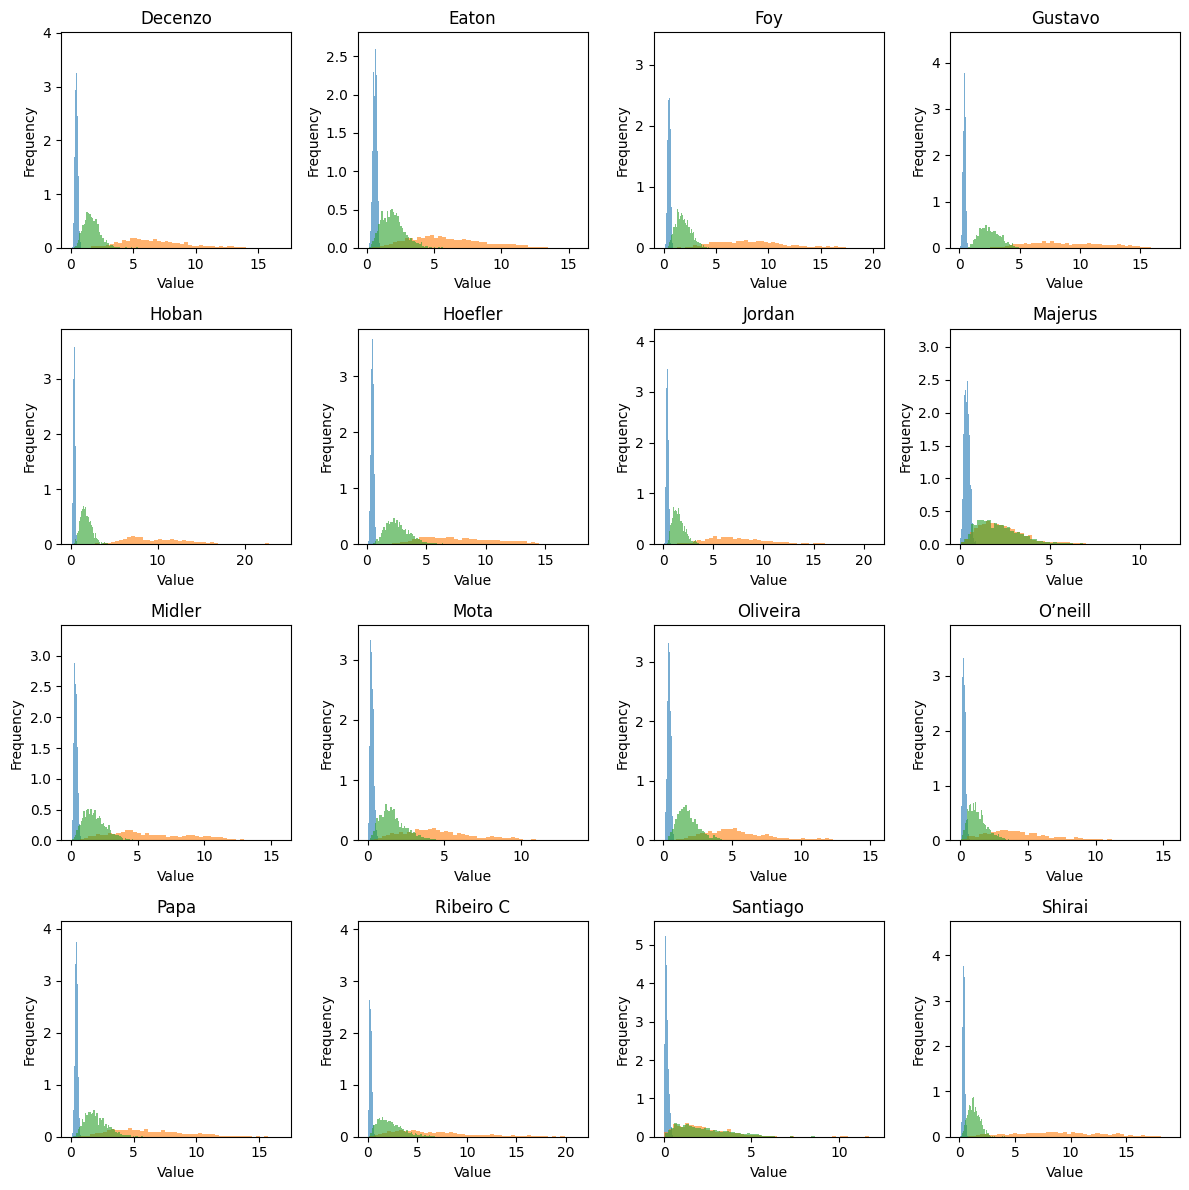

In [ ]:
import matplotlib.pyplot as plt


# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()

for index, row in initial_bayesian_df_tricks.iterrows():
    params_data = row['params']
    
    # Get the current subplot
    ax = axes[index]
    
    # Plot histograms for each parameter in the 'params_data' variable
    for i in range(3):  # Assuming each tuple has 3 elements
        param_values = [param[i] for param in params_data]
        ax.hist(param_values, bins=50, density=True, alpha=0.6, label=r"Param {i}")
    
    ax.set_title(row['id'])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any remaining empty subplots
for i in range(len(initial_bayesian_df_tricks), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


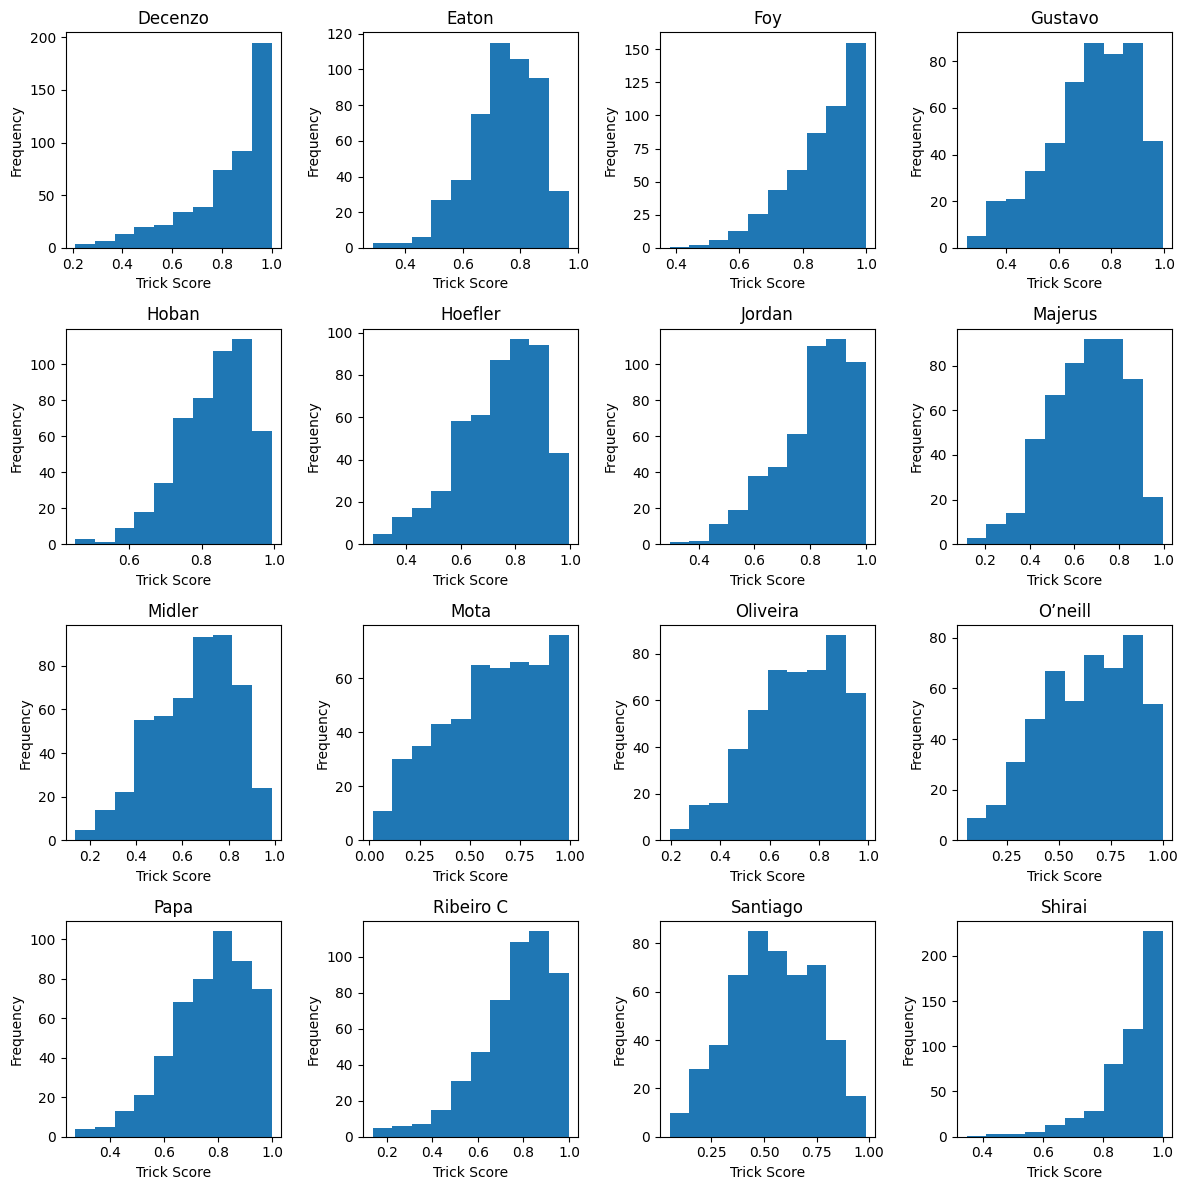

In [ ]:
# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Flatten the axes array to iterate over it
axes = axes.flatten()

for index, row in initial_bayesian_df_tricks.iterrows():
    samps = np.random.beta(row['alpha_metropolis'], row['betha_metropolis'], size=500)
    
    # Get the current subplot
    ax = axes[index]
    
    # Plot the histogram on the current subplot
    ax.hist(samps)
    ax.set_title(row['id'])
    ax.set_xlabel('Trick Score')
    ax.set_ylabel('Frequency')

# Hide any remaining empty subplots
for i in range(len(initial_bayesian_df_tricks), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

##### Metropolis algorithm alternative 2 [Erik]:

In [ ]:
def metropolis_method_alt2(data, n_samples):
    
    alphas = np.zeros((n_samples))
    betas = np.zeros((n_samples))
    thetas = np.ones((n_samples))
    thetas = thetas * 0.5
    
    #init_guess = get_moment_estimators(data)
    init_guess = initial_guess_trick_with_zeroes

    alphas[0] = init_guess[0] 
    betas[0] = init_guess[1]

    for i in range(n_samples - 1):
        last_alpha = alphas[i]
        last_beta = betas[i]
        last_theta = thetas[i]
        
       # Att exponentiera ser till att alpha och beta är positivt, hade abs innan men det kan leda till alpha och beta med bias och det gick snabbare att konvergera
        proposal_alpha =  np.exp(np.log(last_alpha) + stats.norm.rvs( 0.5, size=1))[0]
        proposal_beta =   np.exp(np.log(last_beta) + stats.norm.rvs(0.5, size=1))[0]
        
        proposal_theta = abs(stats.uniform.rvs(0,1, size = 1))[0]

        
        # Note that the acceptance probability rho is calculated for the *pair* of
        # proposed samples.
        log_rho = log_posterior(proposal_alpha, proposal_beta, proposal_theta, data) - log_posterior(last_alpha, last_beta, last_theta, data)
        
        u = stats.uniform.rvs()
        
    
        if np.log(u) <= log_rho:
            alphas[i + 1] = proposal_alpha
            betas[i + 1] = proposal_beta
            thetas[i+1] = proposal_theta
        else:
            alphas[i + 1] = last_alpha
            betas[i + 1] = last_beta
            thetas[i +1] = last_theta
    
    return alphas, betas, thetas

In [ ]:
df_candidates = df[df['id'].isin(contestants)]

df_of_estimates = pd.DataFrame(contestants, columns=["id"])

def extract_trick_values(id, remove_zero):
    id_mask = (df["id"] == id)
    all_tricks = np.concatenate(df[id_mask][['trick 1', 'trick 2', 'trick 3', 'trick 4']].values)
    if remove_zero:

        non_zero_mask = all_tricks != 0
        return all_tricks[non_zero_mask]
    
    return all_tricks

df_of_estimates['theta_obs'] = np.nan

for id in df_candidates["id"]:
    id_mask = (id == df["id"])
    
    approx_succesfull_trick = np.mean(df[id_mask][["make 1", "make 2", "make 3", "make 4"]])
    
    df_of_estimates.loc[df_of_estimates['id'] == id, "theta_obs"] = approx_succesfull_trick

C:\Users\villi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\villi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\villi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.

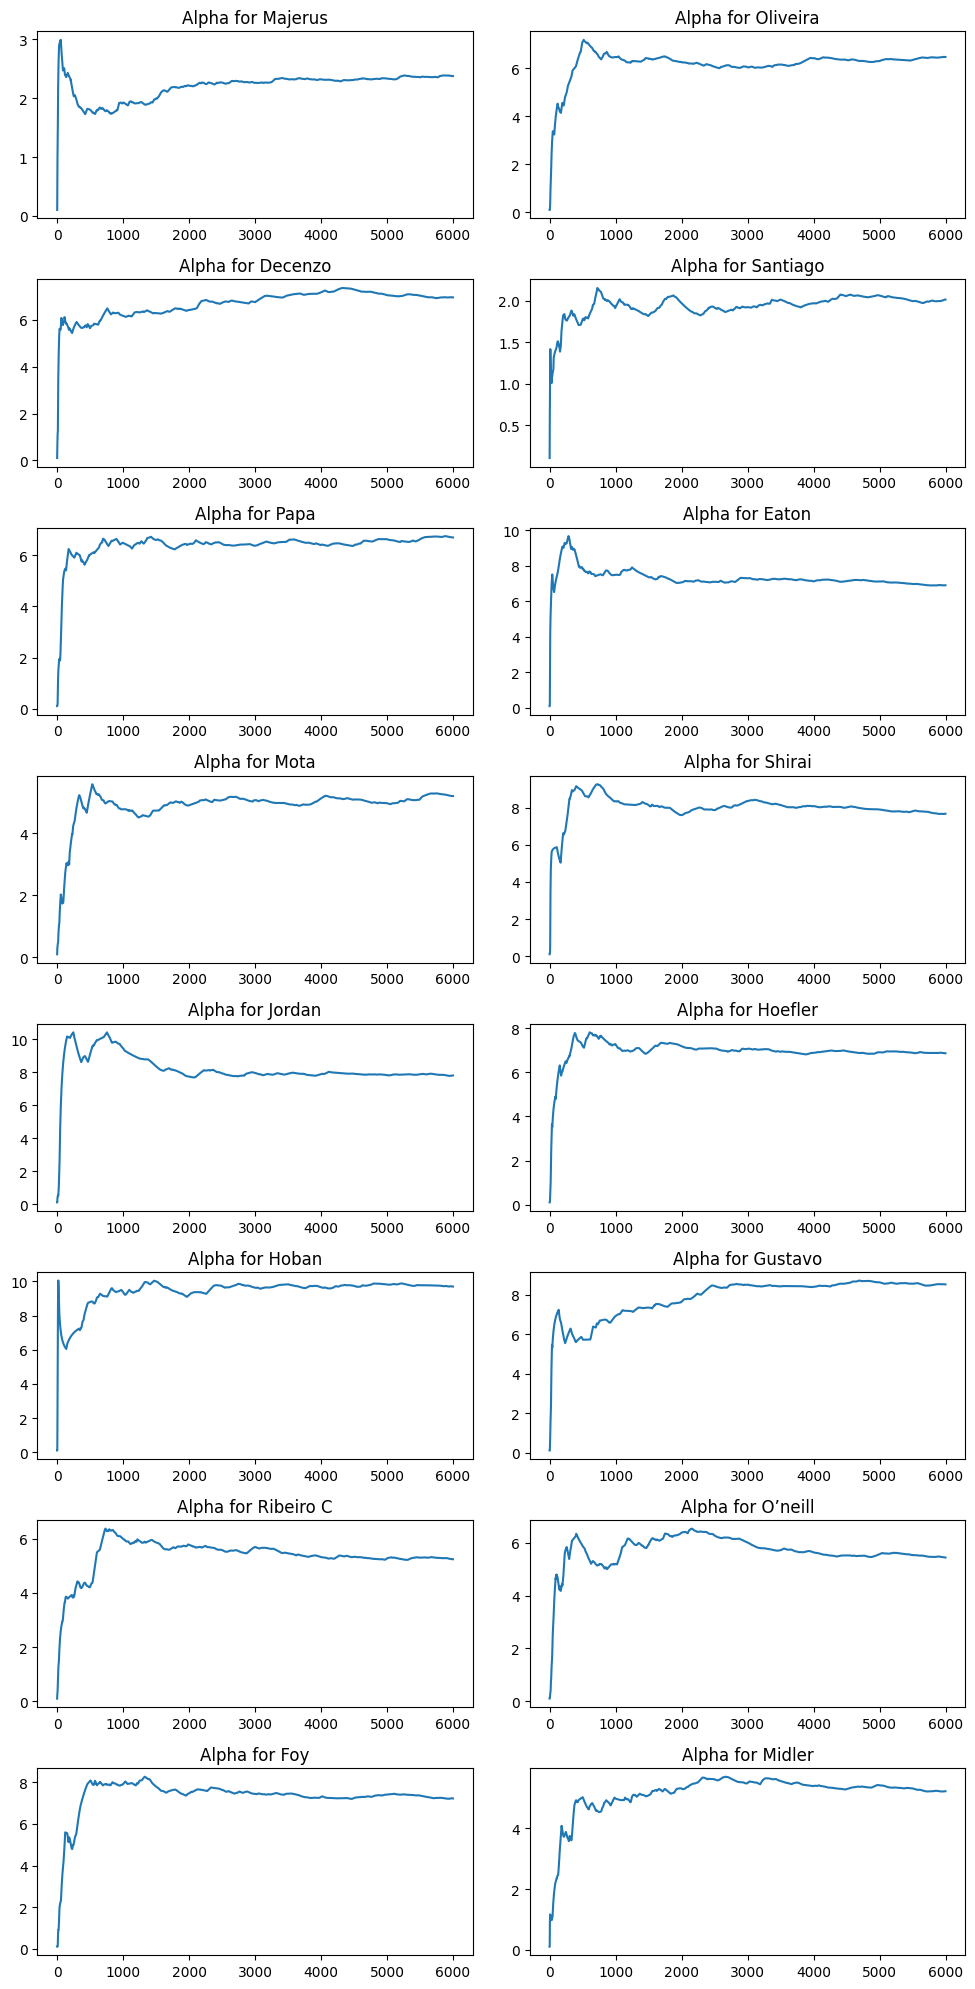

In [ ]:
fig, axs = plt.subplots(8, 2, figsize=(10, 20))
idx = 0
for i in range(8):
    for j in range(2):
        id = contestants[idx] 
        data = extract_trick_values(id, False)
        alphas, _, _=metropolis_method_alt2(data, 6000)
    
        axs[i, j].plot(np.cumsum(alphas) / np.arange(1, len(alphas) + 1))
        axs[i, j].set_title(f'Alpha for {id}')
        idx += 1


plt.tight_layout()
plt.show()

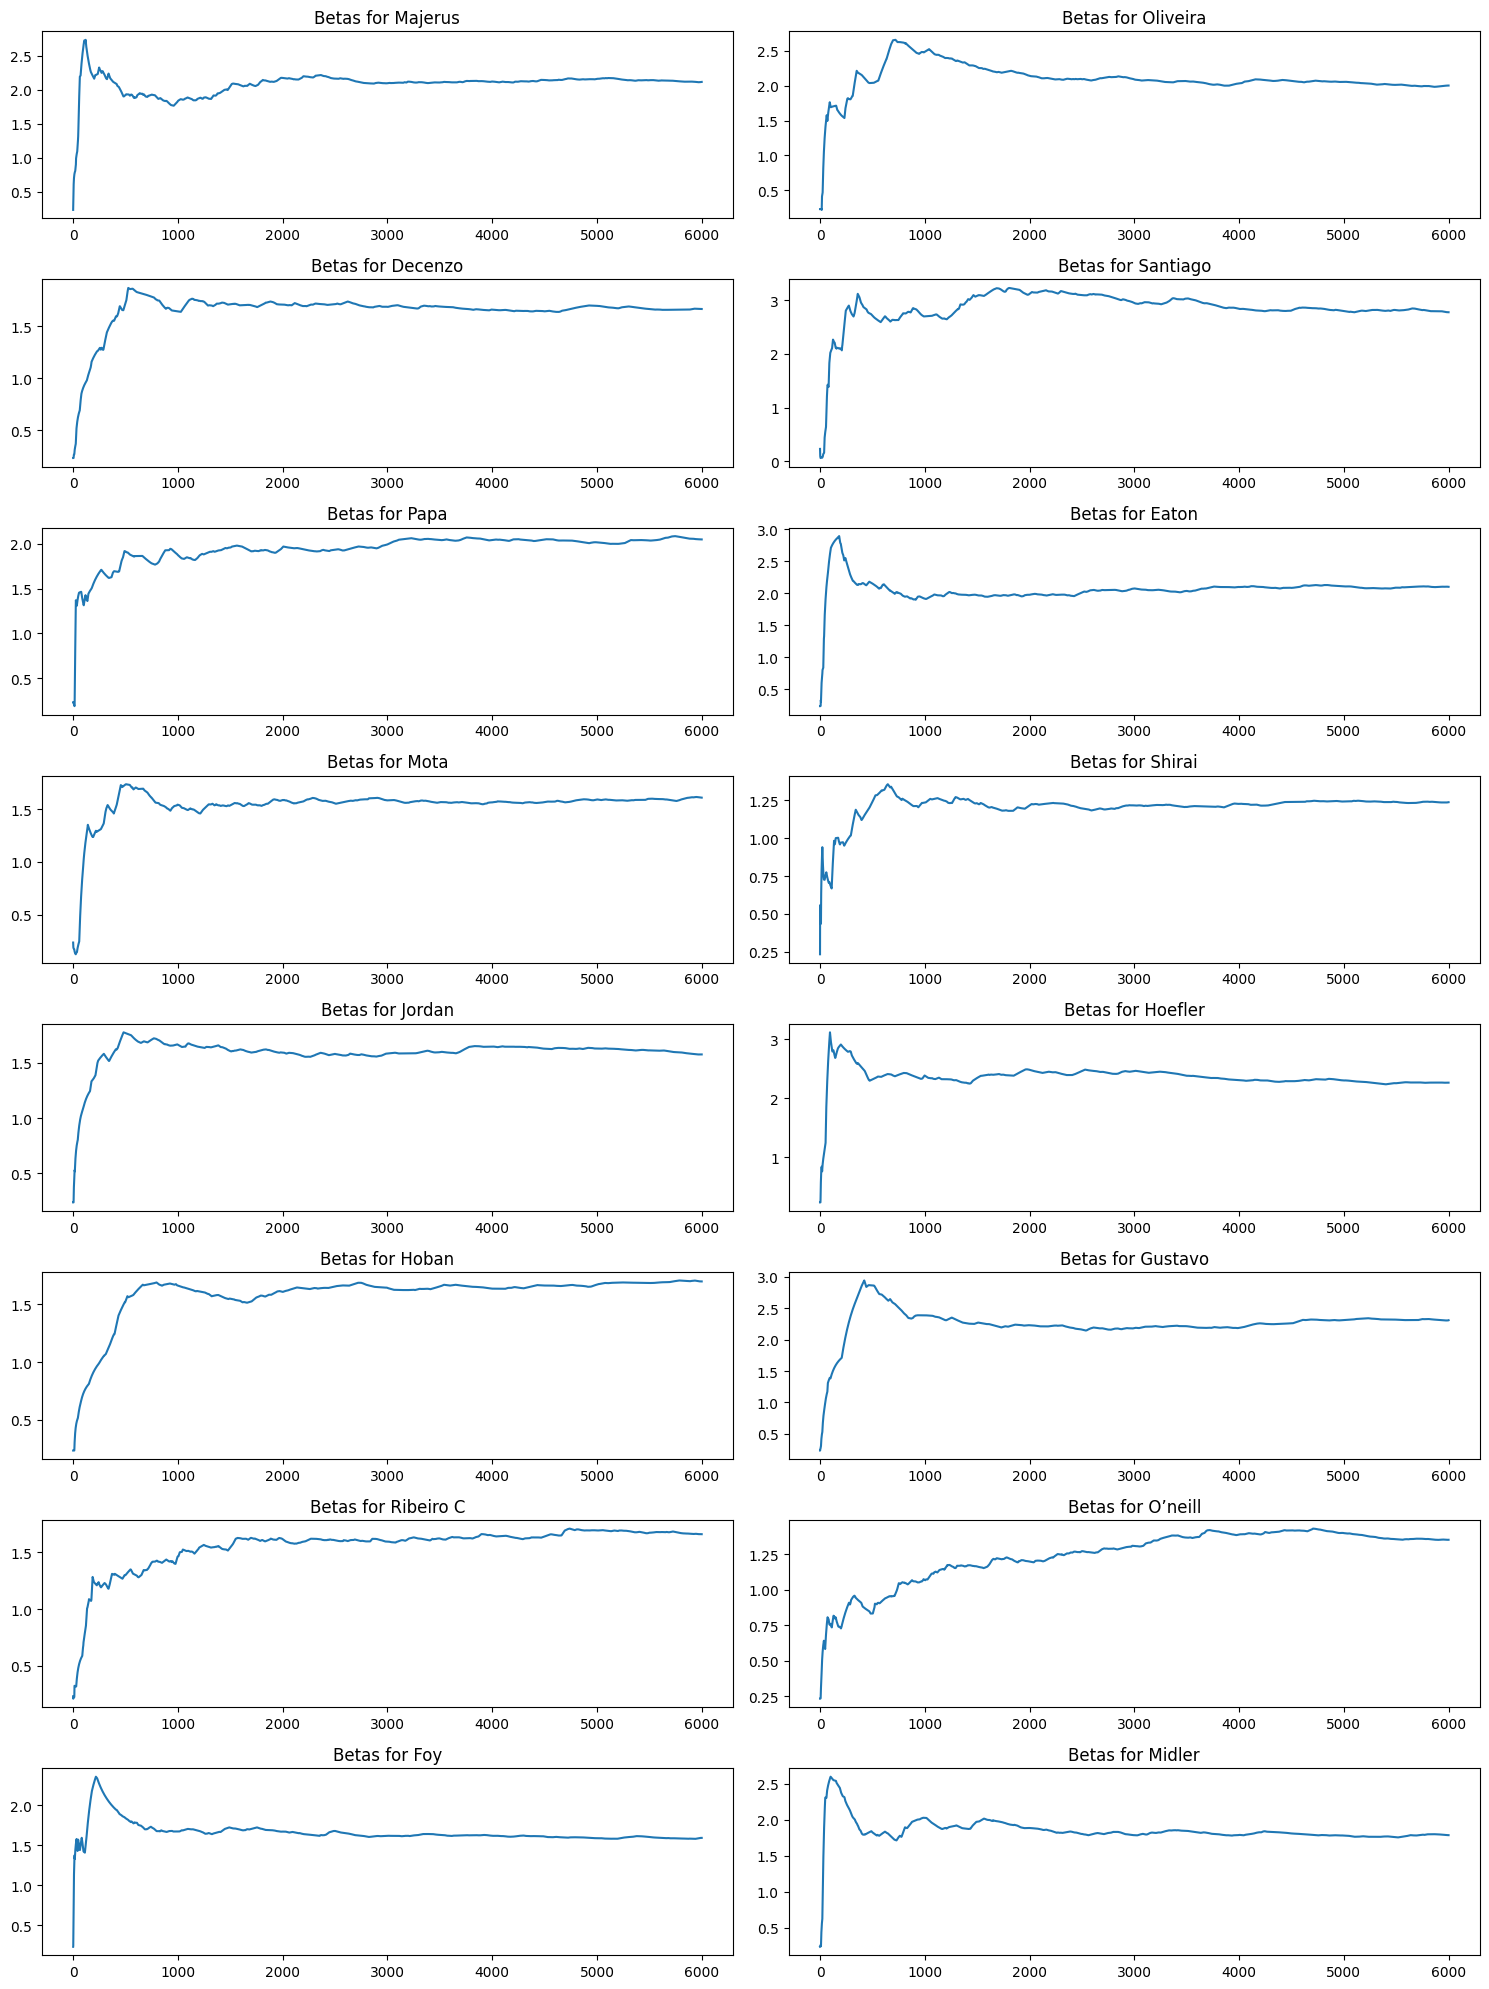

In [ ]:
fig, axs = plt.subplots(8, 2, figsize=(15, 20))
idx = 0
for i in range(8):
    for j in range(2):
        id = contestants[idx] 
        data = extract_trick_values(id, False)
        _, betas, _=metropolis_method_alt2(data, 6000)
    
        axs[i, j].plot(np.cumsum(betas) / np.arange(1, len(betas) + 1))
        axs[i, j].set_title(f'Betas for {id}')
        idx += 1


plt.tight_layout()
plt.show()

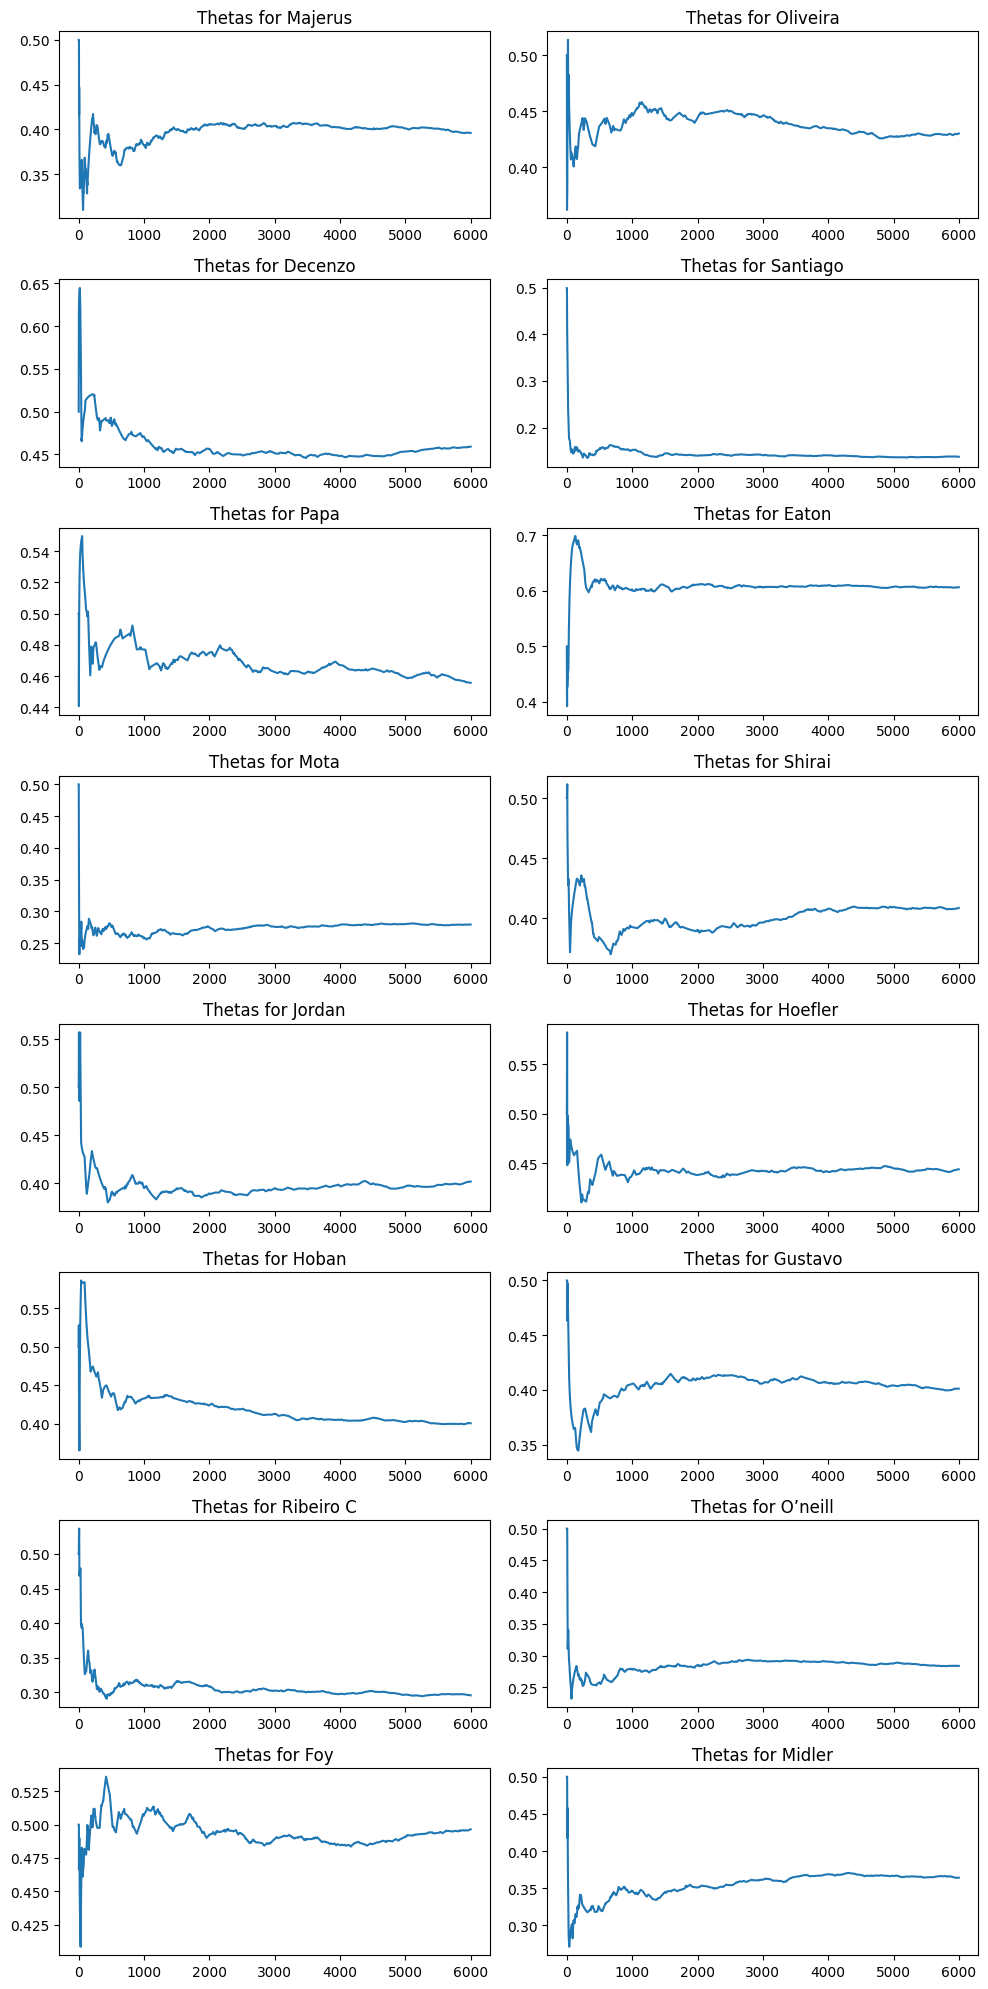

In [ ]:
fig, axs = plt.subplots(8, 2, figsize=(10, 20))
idx = 0

for i in range(8):
    for j in range(2):
        id = contestants[idx] 
        data = extract_trick_values(id, False)
        _, _, thetas=metropolis_method_alt2(data, 6000)
    
        axs[i, j].plot(np.cumsum(thetas) / np.arange(1, len(thetas) + 1))
        axs[i, j].set_title(f'Thetas for {id}')
        idx += 1


plt.tight_layout()
plt.show()

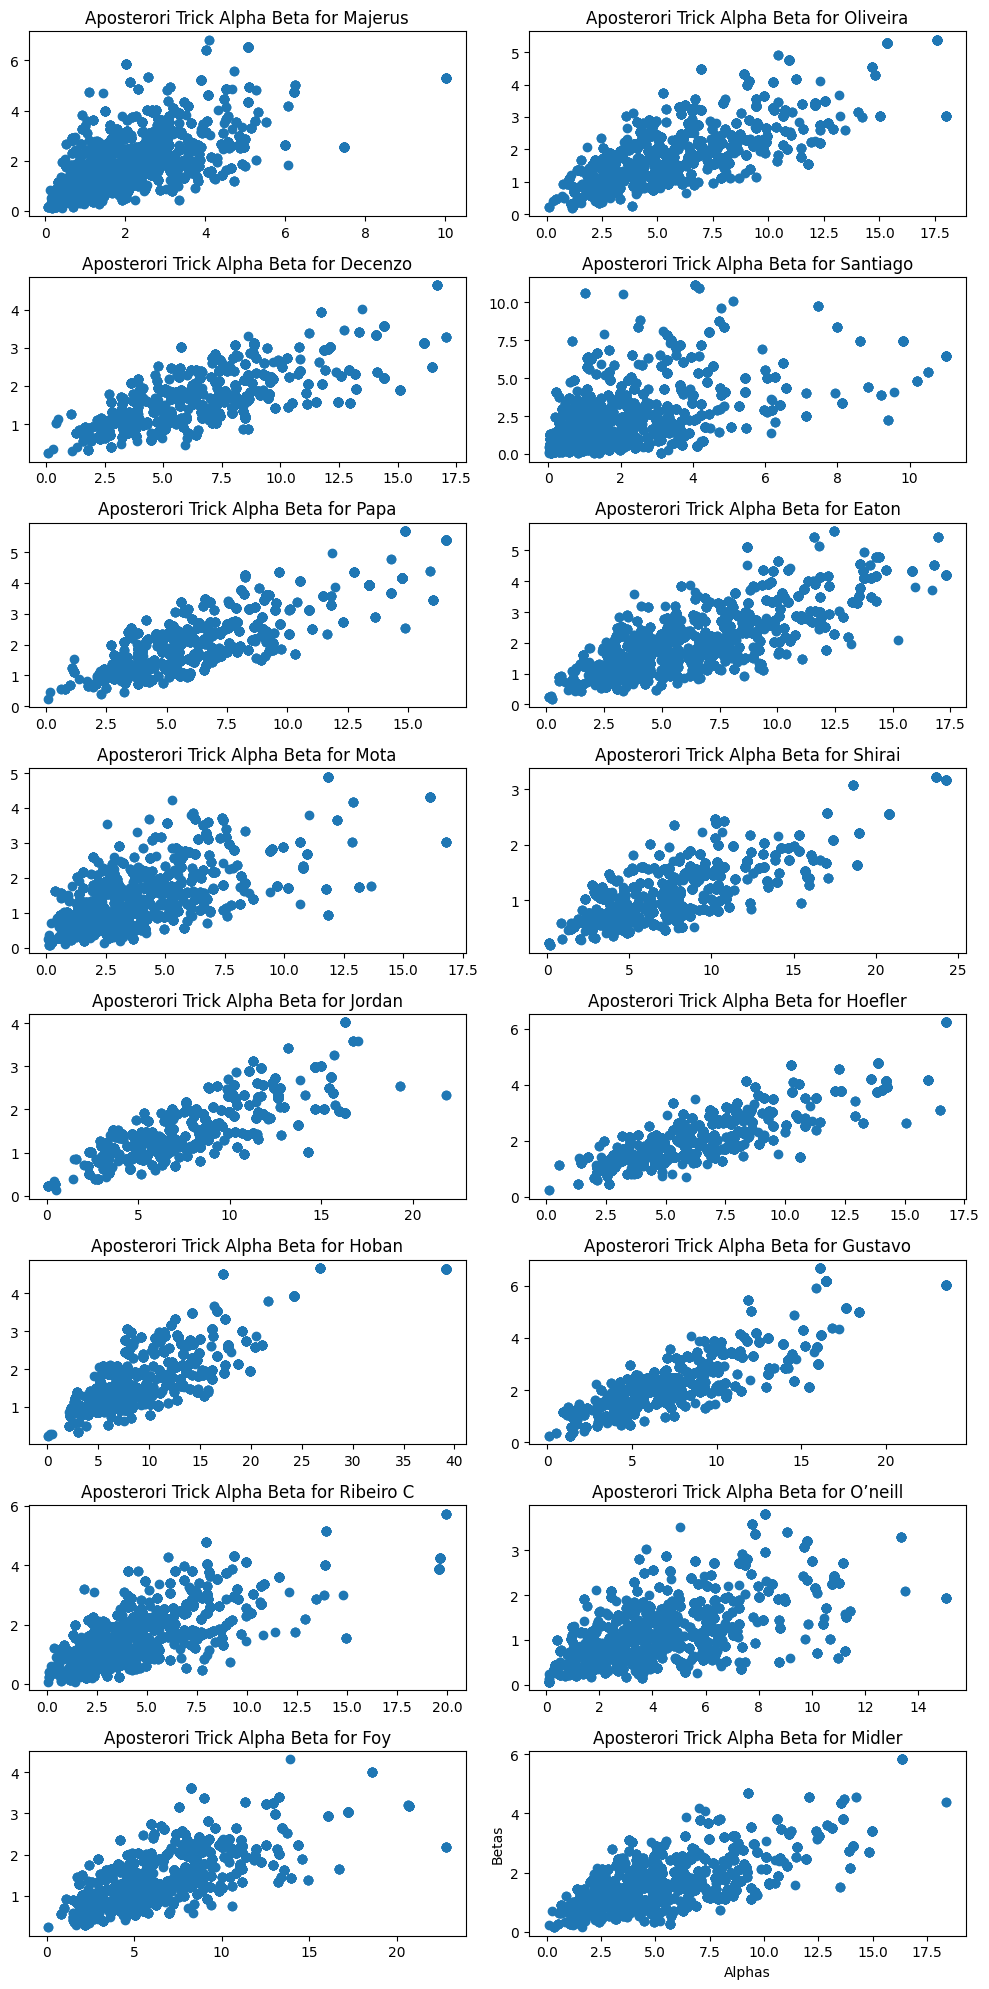

In [ ]:
fig, axs = plt.subplots(8, 2, figsize=(10, 20))

idx = 0

for i in range(8):
    for j in range(2):
        id = contestants[idx] 
        data = extract_trick_values(id, False)
        alphas, betas,_ =metropolis_method_alt2(data, 5000)
        axs[i, j].scatter(alphas, betas)
        plt.xlabel('Alphas')
        plt.ylabel('Betas')
        axs[i, j].set_title(f'Aposterori Trick Alpha Beta for {id}')
        idx += 1


plt.tight_layout()
plt.show()

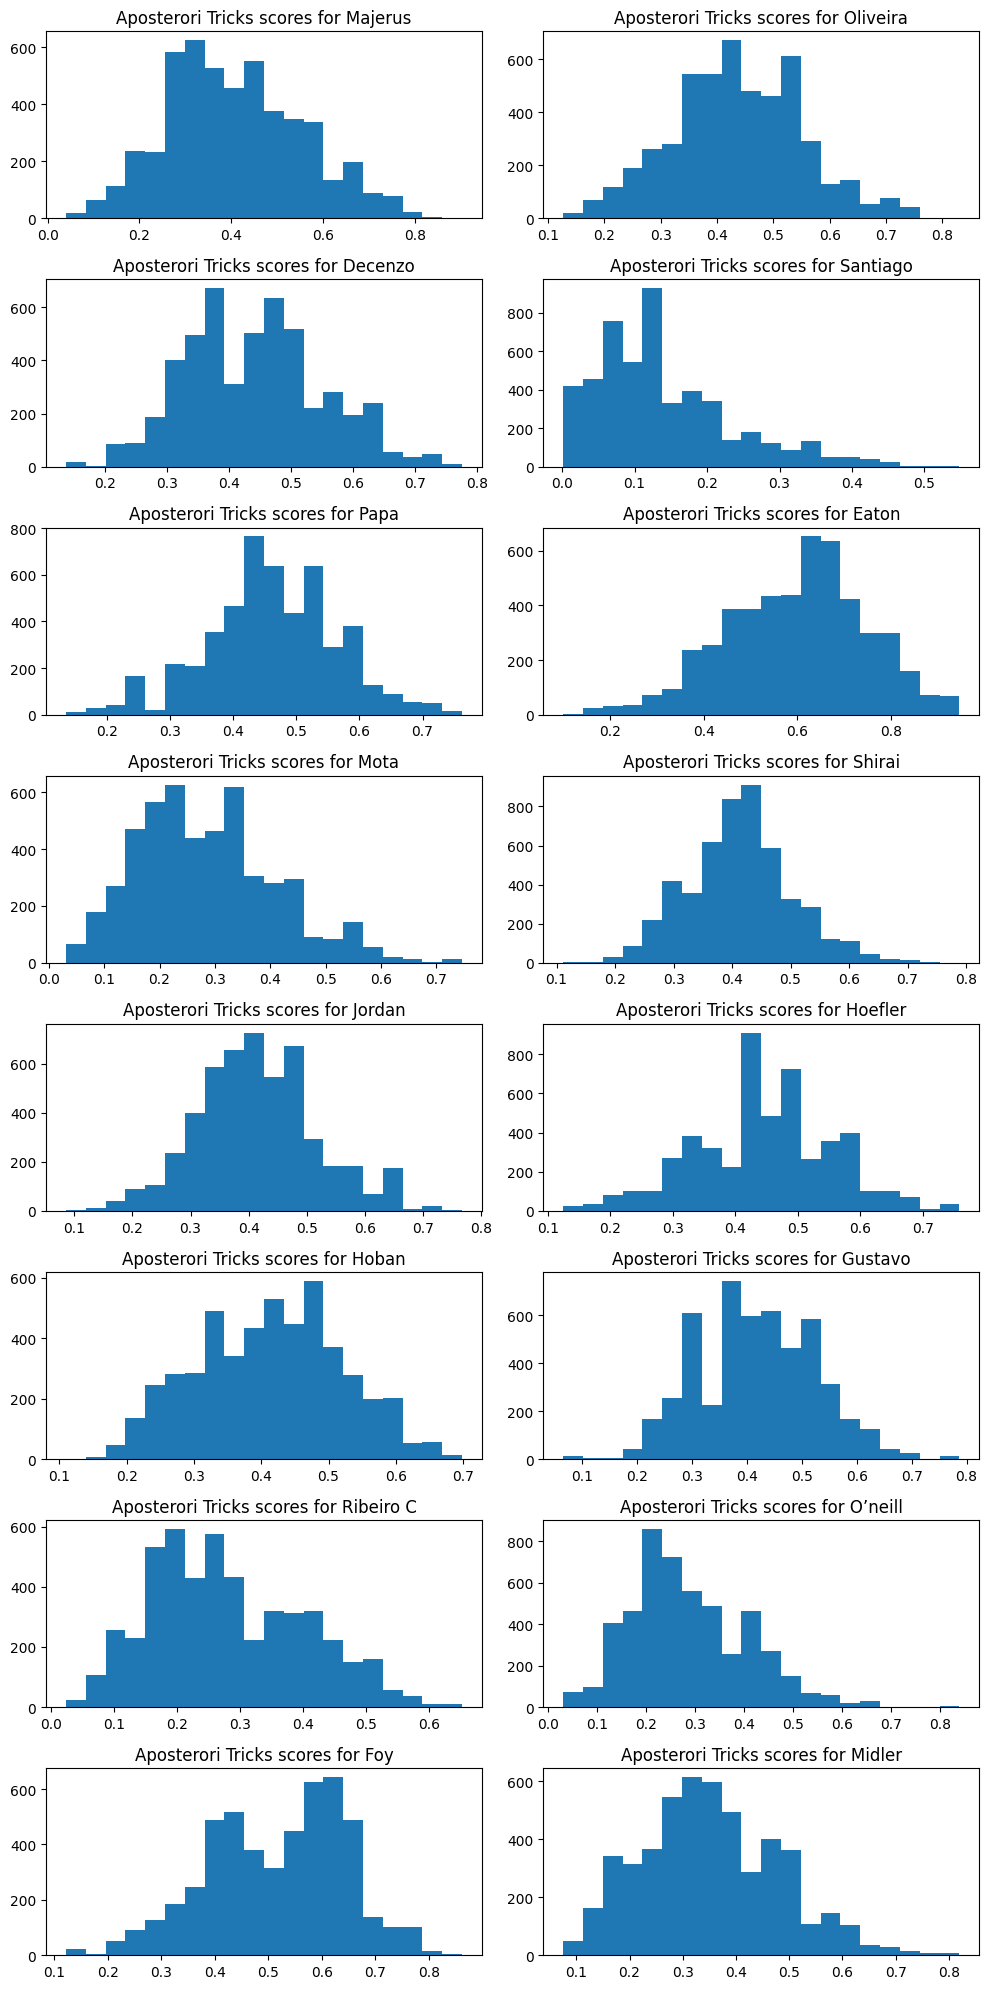

In [ ]:
fig, axs = plt.subplots(8, 2, figsize=(10, 20))

idx = 0

for i in range(8):
    for j in range(2):
        id = contestants[idx] 
        data = extract_trick_values(id, False)
        _,_,thetas=metropolis_method_alt2(data, 5000)
        axs[i, j].hist(thetas, bins= 20)
        axs[i, j].set_title(f'Aposterori Tricks scores for {id}')
        idx += 1


plt.tight_layout()
plt.show()

In [ ]:
df_of_estimates['alpha_bayes_X_mean'] = np.nan
df_of_estimates['beta_bayes_X_mean'] = np.nan
df_of_estimates['theta_bayes_mean'] = np.nan
df_of_estimates['alpha_bayes_X_s^2'] = np.nan
df_of_estimates['beta_bayes_X_s^2'] = np.nan
df_of_estimates['theta_bayes_s^2'] = np.nan


for id in contestants:
    
    data = extract_trick_values(id, False)
    alphas_est, betas_est, thetas_est = metropolis_method_alt2(data, 5000)
    df_of_estimates.loc[df_of_estimates['id'] == id, "alpha_bayes_X_mean"] = np.mean(alphas_est)
    df_of_estimates.loc[df_of_estimates['id'] == id, "beta_bayes_X_mean"] = np.mean(betas_est)
    df_of_estimates.loc[df_of_estimates['id'] == id, "theta_bayes_mean"] = np.mean(thetas_est)
    
    df_of_estimates.loc[df_of_estimates['id'] == id, "alpha_bayes_X_s^2"] = np.var(alphas_est, ddof= 1)
    df_of_estimates.loc[df_of_estimates['id'] == id, "beta_bayes_X_s^2"] = np.var(betas_est, ddof=1)
    df_of_estimates.loc[df_of_estimates['id'] == id, "theta_bayes_s^2"] = np.var(thetas_est, ddof=1)

df_of_estimates[['id', "alpha_bayes_X_mean", "beta_bayes_X_mean", "theta_bayes_mean", "alpha_bayes_X_s^2", "beta_bayes_X_s^2", "theta_bayes_s^2"]]
    

,id,alpha_bayes_X_mean,beta_bayes_X_mean,theta_bayes_mean,alpha_bayes_X_s^2,beta_bayes_X_s^2,theta_bayes_s^2
0,Majerus,2.486714,2.208221,0.401183,1.432636,1.256518,0.020252
1,Oliveira,6.157759,1.941321,0.438984,8.407156,0.780011,0.015874
2,Decenzo,6.182292,1.575137,0.450550,6.478981,0.370571,0.012640
3,Santiago,2.200642,2.699688,0.140615,2.008188,3.471935,0.007871
4,Papa,6.892947,2.305916,0.450498,8.042507,0.855585,0.012143
5,Eaton,6.046085,2.029750,0.595721,7.351344,0.743709,0.020772
6,Mota,4.661047,1.711206,0.284917,7.784164,0.887310,0.014455
7,Shirai,7.714678,1.161653,0.433691,10.378212,0.179672,0.009854
8,Jordan,8.227247,1.634593,0.405021,11.911198,0.358101,0.011725
9,Hoefler,7.155920,2.287073,0.455181,10.500210,0.930838,0.012143


### (c) 
- Propose a (joint) prior distribution for the parameters of your model $Y_i$ from task $2(c)$ and justify your choice. 

- You can assume that the model's parameters for skateboarder $i$ are independent of all other parameters including $\theta_i$, $\alpha_i$, and $\beta_i$. 

- Generate 5000 samples from the posterior distribution (make sure to save these samples!) and create a scatter plot of the results. 

- What is the sample mean and sample variance for each of your parameters based on your outcomes?

In [ ]:
from scipy.special import loggamma

def log_prior_Y(alpha, beta, precision, lambda_hyper):
    
    theta_hyper = lambda_hyper*precision
    
    return theta_hyper * np.log(lambda_hyper) - loggamma(theta_hyper) + (theta_hyper - 1) * np.log(alpha + beta + 1) - lambda_hyper * (alpha + beta + 1) - np.log(alpha + beta)

In [ ]:
def log_posterior_Y(alpha, beta, data):
    
    precision = 5
    lambda_hyper = 0.5

    log_p = log_prior(alpha, beta, precision, lambda_hyper)
    
    for z_i in data:
        log_p +=  loggamma(alpha + beta) - loggamma(alpha) - loggamma(beta) + (alpha-1) * np.log(z_i) + (beta-1) * np.log(1-z_i)
            
    return log_p 

In [ ]:
def metropolis_method_Y(data, n_samples):
    
    alphas = np.zeros((n_samples))
    betas = np.zeros((n_samples))
    
    init_guess = initial_guess_trick_with_zeroes

    alphas[0] = init_guess[0] 
    betas[0] = init_guess[1]

    for i in range(n_samples - 1):
        last_alpha = alphas[i]
        last_beta = betas[i]
    
        
       # Att exponentiera ser till att alpha och beta är positivt, hade abs innan men det kan leda till alpha och beta med bias och det gick snabbare att konvergera
        proposal_alpha =  np.exp(np.log(last_alpha) + stats.norm.rvs( 0.5, size=1))[0]
        proposal_beta =   np.exp(np.log(last_beta) + stats.norm.rvs(0.5, size=1))[0] 

        # Note that the acceptance probability rho is calculated for the *pair* of
        # proposed samples.
        log_rho = log_posterior_Y(proposal_alpha, proposal_beta, data) - log_posterior_Y(last_alpha, last_beta, data)
        
        u = stats.uniform.rvs()
        
    
        if np.log(u) <= log_rho:
            alphas[i + 1] = proposal_alpha
            betas[i + 1] = proposal_beta
            
        else:
            alphas[i + 1] = last_alpha
            betas[i + 1] = last_beta
           
    
    return alphas, betas

In [ ]:
def extract_run_values(id):
    id_mask = (df["id"] == id)
    all_runs = np.concatenate(df[id_mask][['run 1', 'run 2']].values)
    
    return all_runs

for id in contestants:
    data = extract_run_values(id)
    
    
    estimates = get_moment_estimators(data)
    
    df_of_estimates.loc[df_of_estimates['id'] == id, "moment_alpha_Y"] = estimates[0] #alpha
    df_of_estimates.loc[df_of_estimates['id'] == id, "moment_beta_Y"] = estimates[1] #Beta

df_of_estimates[['id', 'moment_alpha_Y', 'moment_beta_Y']]

,id,moment_alpha_Y,moment_beta_Y
0,Majerus,1.212651,1.709400
1,Oliveira,4.396292,3.294015
2,Decenzo,3.569568,2.429706
3,Santiago,2.170197,3.515908
4,Papa,1.829142,1.748642
5,Eaton,77.495591,27.583176
6,Mota,3.301811,3.723318
7,Shirai,1.594273,0.956564
8,Jordan,3.172789,1.080279
9,Hoefler,1.454558,0.800570


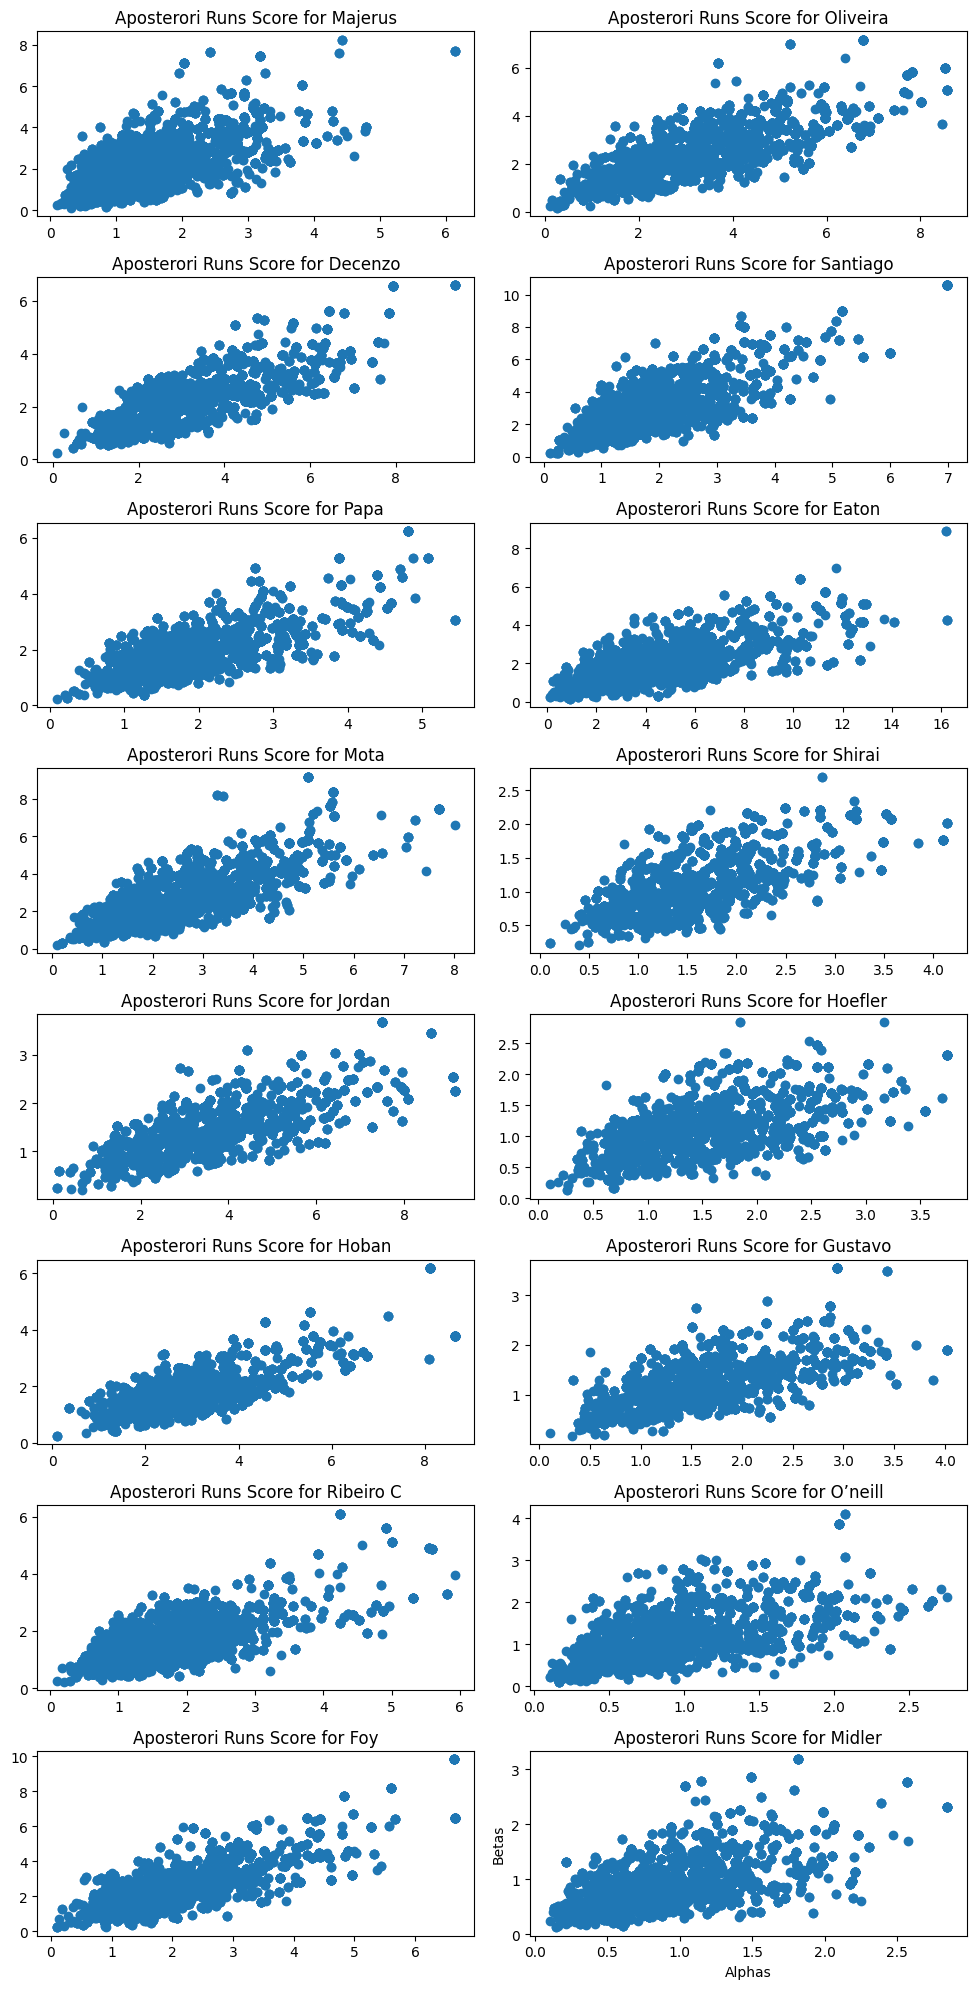

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(8, 2, figsize=(10, 20))

idx = 0

for i in range(8):
    for j in range(2):
        id = contestants[idx] 
        data = extract_run_values(id)
        alphas, betas =metropolis_method_Y(data, 5000)
        axs[i, j].scatter(alphas, betas)
        plt.xlabel('Alphas')
        plt.ylabel('Betas')
        axs[i, j].set_title(f'Aposterori Runs Score for {id}')
        idx += 1

plt.tight_layout()
plt.show()


In [ ]:
df_of_estimates['alpha_bayes_Y_mean'] = np.nan
df_of_estimates['beta_bayes_Y_mean'] = np.nan
df_of_estimates['alpha_bayes_Y_s^2'] = np.nan
df_of_estimates['beta_bayes_Y_s^2'] = np.nan


for id in contestants:
    
    data = extract_run_values(id)
    alphas_est, betas_est = metropolis_method_Y(data, 5000)
    df_of_estimates.loc[df_of_estimates['id'] == id, "alpha_bayes_Y_mean"] = np.mean(alphas_est)
    df_of_estimates.loc[df_of_estimates['id'] == id, "beta_bayes_Y_mean"] = np.mean(betas_est)
    df_of_estimates.loc[df_of_estimates['id'] == id, "alpha_bayes_X_s^2"] = np.var(alphas_est, ddof= 1)
    df_of_estimates.loc[df_of_estimates['id'] == id, "beta_bayes_X_s^2"] = np.var(betas_est, ddof=1)

df_of_estimates[['id', "alpha_bayes_Y_mean",  "beta_bayes_Y_mean", "alpha_bayes_X_s^2", "beta_bayes_X_s^2"]]

,id,alpha_bayes_Y_mean,beta_bayes_Y_mean,alpha_bayes_X_s^2,beta_bayes_X_s^2
0,Majerus,1.617278,2.360390,0.636266,1.518753
1,Oliveira,3.482146,2.698732,2.434027,1.370366
2,Decenzo,3.235073,2.236616,1.732704,0.832756
3,Santiago,2.153824,3.410097,0.969330,2.477708
4,Papa,2.189584,2.154217,0.823385,0.784621
5,Eaton,5.471693,2.318703,7.958623,1.468669
6,Mota,2.811327,3.032783,1.511518,1.661642
7,Shirai,1.638955,1.184930,0.381357,0.201714
8,Jordan,3.928438,1.513035,2.161044,0.289140
9,Hoefler,1.474328,1.083481,0.427927,0.221573


### (d) 
Use your Bayesian model for $[X_i, Y_i]^T$ to simulate 5000 LCQs by drawing samples from the appropriate posterior predictive distributions. 

- What is the mode of your outcomes $W_1, \ldots, W_{5000}$? 

- How many of the real winners are predicted? 

- What is the estimated probability of the real winners based on your samples? 

- And by the mode?

In [ ]:
df_of_estimates[['id',"theta_bayes_mean", "alpha_bayes_X_mean", "beta_bayes_X_mean",  "alpha_bayes_Y_mean",  "beta_bayes_Y_mean"]]

,id,theta_bayes_mean,alpha_bayes_X_mean,beta_bayes_X_mean,alpha_bayes_Y_mean,beta_bayes_Y_mean
0,Majerus,0.401183,2.486714,2.208221,1.617278,2.360390
1,Oliveira,0.438984,6.157759,1.941321,3.482146,2.698732
2,Decenzo,0.450550,6.182292,1.575137,3.235073,2.236616
3,Santiago,0.140615,2.200642,2.699688,2.153824,3.410097
4,Papa,0.450498,6.892947,2.305916,2.189584,2.154217
5,Eaton,0.595721,6.046085,2.029750,5.471693,2.318703
6,Mota,0.284917,4.661047,1.711206,2.811327,3.032783
7,Shirai,0.433691,7.714678,1.161653,1.638955,1.184930
8,Jordan,0.405021,8.227247,1.634593,3.928438,1.513035
9,Hoefler,0.455181,7.155920,2.287073,1.474328,1.083481


In [ ]:
def simulate_lcq_bayes(df_of_estimates):
    new_lcq_df_bayes = pd.DataFrame(columns=["id", "run 1", "run 2", "trick 1", "trick 2", "trick 3", "trick 4"])
    
    for index, row in df_of_estimates.iterrows():
        
        theta_average=row['theta_bayes_mean']
        alpha_trick=row['alpha_bayes_X_mean']
        beta_trick=row['beta_bayes_X_mean']    
        alpha_run=row['alpha_bayes_Y_mean']
        beta_run=row['beta_bayes_Y_mean']
        
        new_lcq_df_bayes.at[index, "id"]=row['id']
        
        for _ in range(4):
            if successful_trick(theta_average):
                trick=trick_score(alpha_trick, beta_trick)
            else:
                trick=0
            new_lcq_df_bayes.at[index, f"trick {_+1}"] = round(trick,1)
        
        for _ in range(2):
            run=run_score(alpha_run, beta_run)
            new_lcq_df_bayes.at[index, f"run {_+1}"] = round(run,1)
        
        total_score_value=total_score(new_lcq_df_bayes.loc[index, ['trick 1', 'trick 2', 'trick 3', 'trick 4']], new_lcq_df_bayes.loc[index, ['run 1', 'run 2']]) 
        new_lcq_df_bayes.at[index, "total score"]=round(total_score_value,1)
    
    return new_lcq_df_bayes

In [ ]:
win_counts_bayes = {}

for _ in range(5000):
    top_four_df=find_top_four_skateboarders(simulate_lcq_bayes(df_of_estimates))
    winner_id = top_four_df.iloc[0]['id']
    win_counts_bayes[winner_id] = win_counts_bayes.get(winner_id, 0) + 1
    
df_win_counts_bayes = pd.DataFrame(list(win_counts_bayes.items()), columns=['id', 'win_count'])
df_ranked_bayes = df_win_counts_bayes.sort_values(by='win_count', ascending=False)

df_ranked_bayes

,id,win_count
5,Shirai,1054
3,Jordan,783
6,Eaton,664
1,Decenzo,470
7,Hoban,463
9,Hoefler,314
0,Oliveira,278
2,Gustavo,258
4,Papa,191
11,Midler,183


The actual winners for the LCQ are Gustavo, Hoban, Eaton, and Decenzo. 

### (e) 
In the model in task $3(\mathrm{d})$, we assumed that the parameters $\Upsilon_i$ for $Y_i$ and the parameters $\Theta_i = [\Theta_i, A_i, B_i]^T$ for $X_i$ are independent given the data. 

- Why?

Answer

At the same time, we did not assume that $\Theta_i \perp A_i, B_i$ are independent given the data. 

1. Let $X_i^{(1)}, X_i^{(2)}, X_i^{(3)}, X_i^{(4)}$ denote skateboarder $i$'s four trick scores.
2. Let $Y_i^{(1)}, Y_i^{(2)}$ denote skateboarder $i$'s two run scores.
3. Let $O_i$ denote their total score. 

- Draw a directed acyclic graph with as few edges as possible so that the joint distribution of $O_i, X_i^{(1)}, X_i^{(2)}, X_i^{(3)}, X_i^{(4)}, Y_i^{(1)}, Y_i^{(2)}, \Theta_i, A_i, B_i$ and $\Upsilon$ is Markov with respect to it. 

Answer


- Based on your graph, can you conclude that the marginal posterior distribution for $\Theta_i, A_i$, and $B_i$ factorizes as:
$$
f_{\theta_i, \alpha_i, \beta_i | \boldsymbol{X}_i}(\theta_i, \alpha_i, \beta_i | \boldsymbol{x}_i) = f_{\theta_i | \boldsymbol{X}_i}(\theta_i | \boldsymbol{x}_i) f_{\alpha_i, \beta_i | \boldsymbol{X}_i}(\alpha_i, \beta_i | \boldsymbol{x}_i) ?
$$

Answer


Consider your parameters $\Upsilon_i$ for $Y_i$ and the parameters $\Theta_i$ for $X_i$. 

- According to your graph, is the following assumption reasonable?

$$
\Upsilon_i \perp \Theta_i | X_i^{(1)}, X_i^{(2)}, X_i^{(3)}, X_i^{(4)}, Y_i^{(1)}, Y_i^{(2)}
$$

Answer

- Can we assume the independence relation $\Upsilon_i \perp \Theta_i | O_i$ if only the data $o_i$ is given instead?

In [ ]:
#Code

Answer

# 4. A Bayesian model with a hierarchy
To account for possible variations in skateboarders' performances between different competitions, we can build a model that uses a hierarchy. As we saw in the lectures, we can build a Bayesian hierarchy for $V_i \sim \operatorname{Ber}(\theta_i)$ if we group outcomes $v_i$ according to the different competitions. For simplicity, we use our frequentist point estimates for the parameters $\alpha_i, \beta_i$ and the parameters for $Y_i$ from task 2.

### (a) 
Assume that $\Theta_i \mid A_i=\alpha_i, B_i=\beta_i \sim \operatorname{Beta}(\alpha_i, \beta_i)$ and choose a suitable simultaneous prior distribution for $\left[\Theta_i, A_i, B_i\right]^T$. 

- Justify your choice.

Answer

### (b) 

Generate 5000 random outcomes from the simultaneous posterior distribution
$$
f_{A_i, B_i \mid \boldsymbol{X}_i}(a_i, b_i \mid \boldsymbol{x}_i) .
$$

In [ ]:
#Code

Use your simulations to generate 5000 random outcomes from the marginal posterior distribution $\Theta_i \mid \boldsymbol{X}_i=\boldsymbol{x}_i$.

In [ ]:
#Code

Plot your outcomes for the following posterior distributions:
$$
f_{\theta_i \mid \boldsymbol{X}_i}(\theta_i \mid \boldsymbol{x}_i) \quad \text{and} \quad f_{A_i, B_i \mid \boldsymbol{X}_i}(a_i, b_i \mid \boldsymbol{x}_i) ,
$$

In [ ]:
#Code

Provide estimates for the posterior expected value and posterior variance for each of the parameters. 

- How do these variances for $\theta_i$ compare to the variances for $\theta_i$ computed for the model in Task 3?

Answer

### (c) 
Using your $5000$ samples from part (b), simulate 5000 LCQ competition winners and calculate the mode of the results. 

- What are the respective estimated probabilities for the actual winners and your mode value?

In [ ]:
# Code

Answer

# 5. Discussion 
It is always important to reflect on our model assumptions when conducting statistical inference. Specifically, it is important to assess how the models can be improved.

### (a) 

- How do the results (the skateboarders in the typical values) from the different models compare? 

- Which skateboarders are correctly predicted and which are not? 

- Provide some possible explanations for the differences between the predictions of the different models. 

- Which model do you prefer and why?

Answer

### (b) 

- How do your estimates for $\theta_i$ in Assignment 1 compare to your estimated expected values and variances for $\theta_i$ in Assignments 3 and 4? 

- What is the expected score for a trick for each skateboarder given that the trick has been successfully landed? What is the expected run score? 

- Considering the skateboarders who are predicted to win according to the different models, do these statistics provide any insights into successful strategies for winning? 

- For example, does it work to focus on a good run score over good trick scores? 

- Are there instances where this strategy works? 

- Is it better to have higher trick scores with high variance or slightly worse trick scores with less variance? etc.

Answer

### (c) 

- Estimate the expected value and standard deviation for each skateboarder's total score for the models in Assignments 3 and 4. 

- Do these statistics support your predictions? 

- According to these statistics, what needs to occur for the outcome to be the actual winners?

Answer

### (d) 

- In all the models, we assumed that the skateboarder's performances are independent. For example, we assumed that all $V_i$ are independent. 

- Does this seem like a reasonable assumption? Justify your answer.

Answer

### (e) 

- In all the models, we ignored the order in which the skateboarders took turns. Does this seem like a reasonable thing to do? 

- Why or why not?

Answer